In [1]:
# We load the competition data

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


# Packages

In [2]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 68.1 MB/s eta 0:00:00


# Libraries

In [3]:
import numpy as np
import pandas as pd
import ydata_profiling as pp
import sweetviz as sv
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Predict Calorie Expenditure

### Playground Series - Season 5, Episode 5

### Your Goal: 

Your goal is to predict how many calories were burned during a workout.

### Evaluation:

The evaluation metric for this competition is Root Mean Squared Logarithmic Error(RMSLE).

### Submission File:

For each id row in the test set, you must predict the continuous target, Calories. The file should contain a header and have the following format:

id,Calories

750000,93.2
750001,27.42
750002,103.8
etc.

### Timeline

Start Date - May 1, 2025

Entry Deadline - Same as the Final Submission Deadline

Team Merger Deadline - Same as the Final Submission Deadline

Final Submission Deadline - May 31, 2025

All deadlines are at 11:59 PM UTC on the corresponding day unless otherwise noted. 

The competition organizers reserve the right to update the contest timeline if they deem it necessary.

# Initial analysis

In [4]:
# We load the data

calories_train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv", index_col="id")

In [5]:
calories_train.shape

(750000, 8)

In [6]:
calories_train.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
id                                                                        
0     male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   female   51   161.0    64.0       7.0        84.0       39.8      29.0
3     male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [7]:
calories_train.describe().style.background_gradient(cmap='Greens')

In [8]:
calories_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


# EDA

We start by using auto EDA tools, not just to test them, but also to take a different approach to traditional data exploration. Later, if time permits, I will leave a version with a more traditional EDA approach, with some general function to explore each variable and visualize the data with Seaborn, as I have already done in other notebooks.

We will try two alternatives:

- YData Profiling
  
https://docs.profiling.ydata.ai/latest/

https://github.com/ydataai/ydata-profiling

- SweetViz

https://pypi.org/project/sweetviz/

https://github.com/fbdesignpro/sweetviz

## YData Profiling

In [9]:
# We pass the data to the profiler

profile_calories = pp.ProfileReport(calories_train, title="Calories Profiling Report")

# Get the full profile

profile_calories

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## SweetViz

Uncomment the comparison line of code to compare the train and test datasets with the tool. I usually start by analyzing and processing the train data and then focus on testing, but if you want to do that first, I'll leave the line of code. Don't forget to comment the analyze function line and load the test data.

                                             |          | [  0%]   00:00 -> (? left)


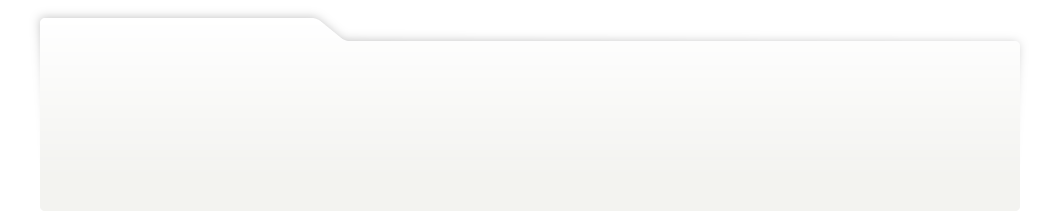
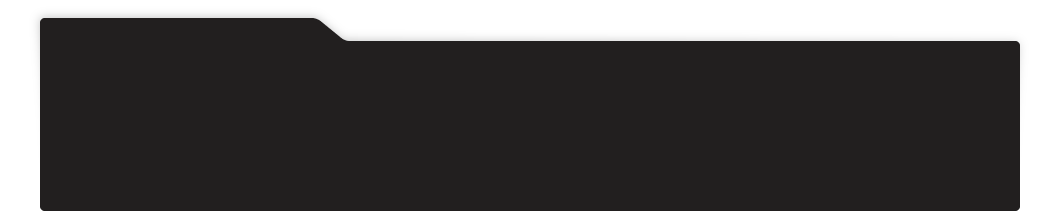
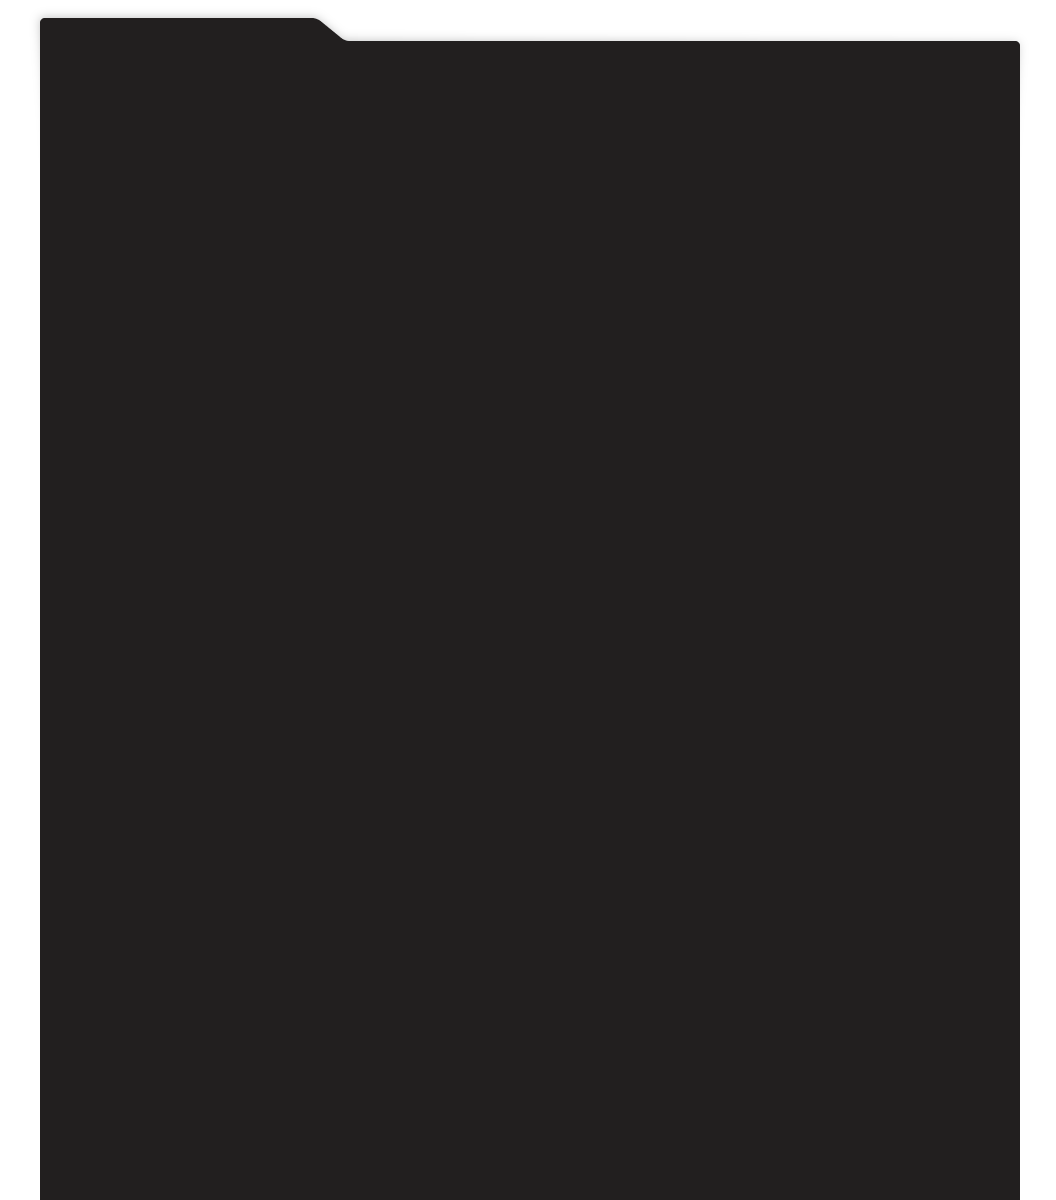
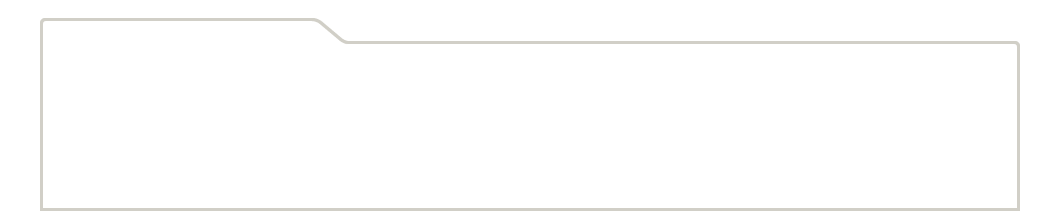
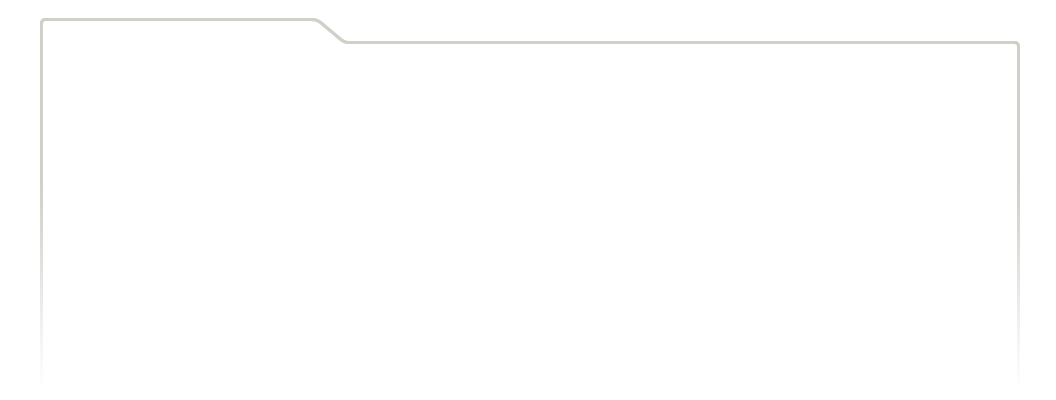
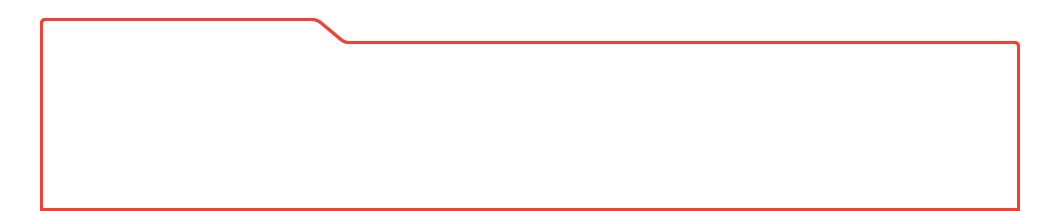
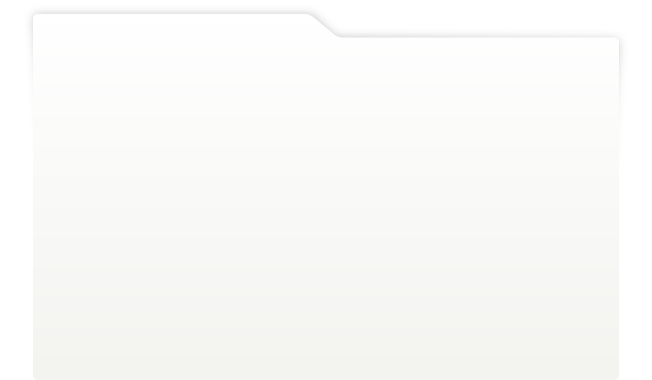
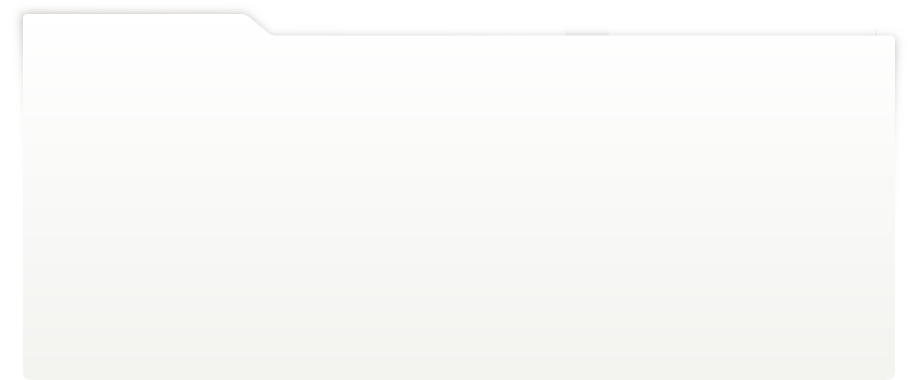
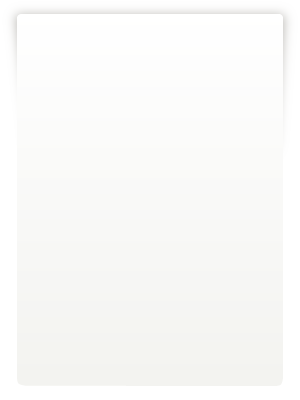
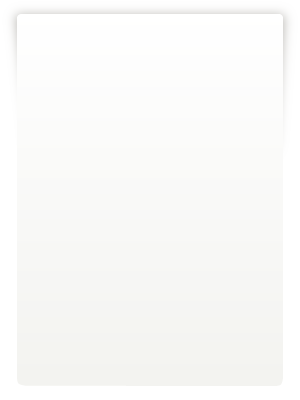
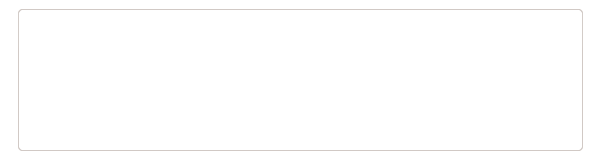
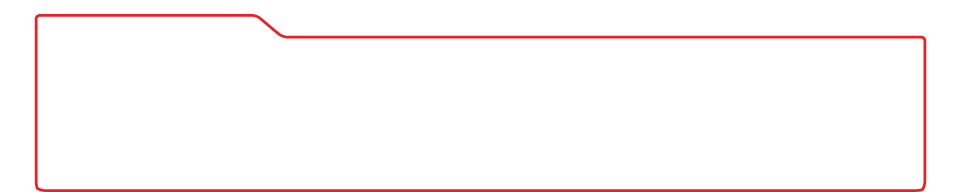
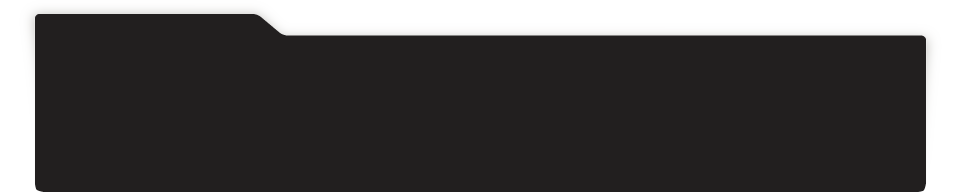
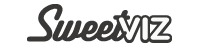
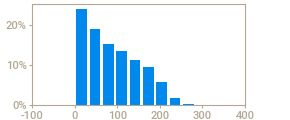
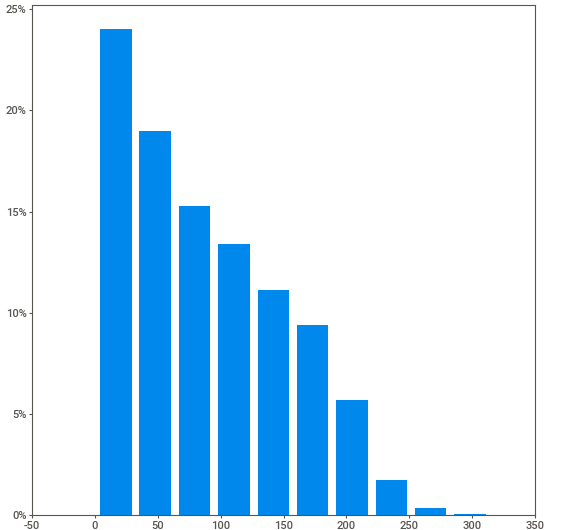
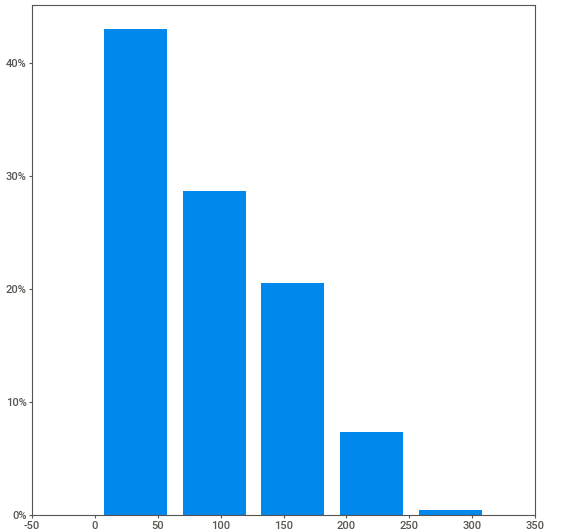
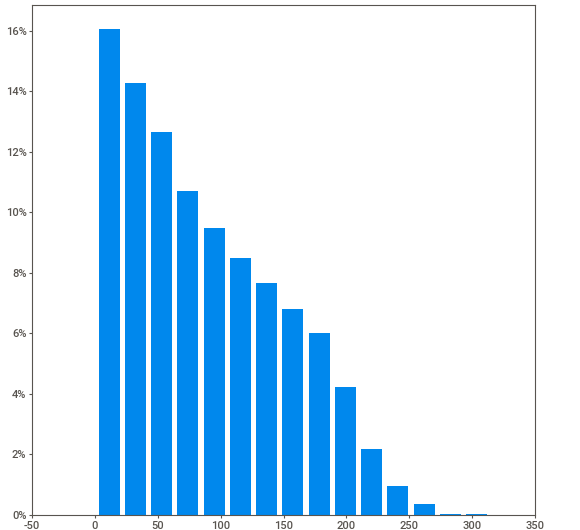
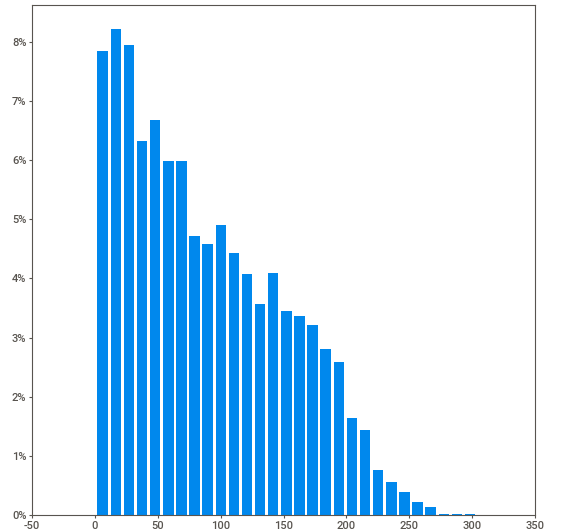
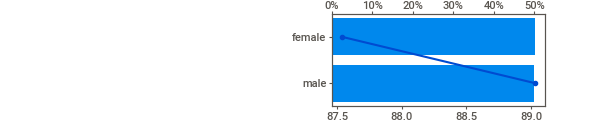
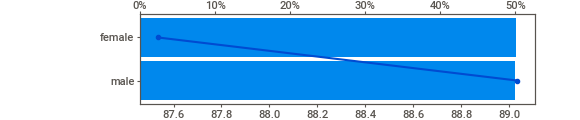
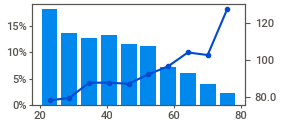
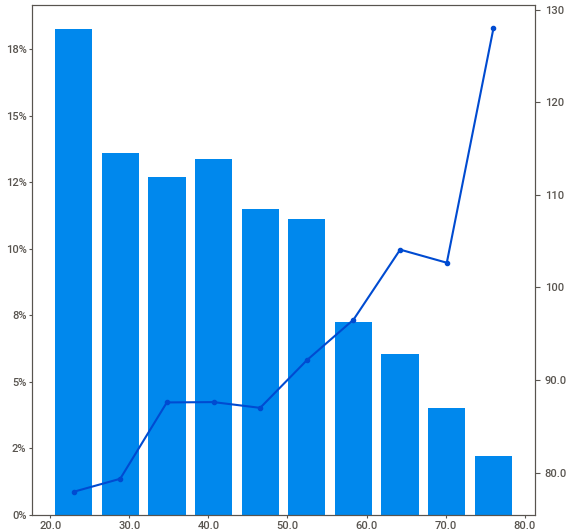
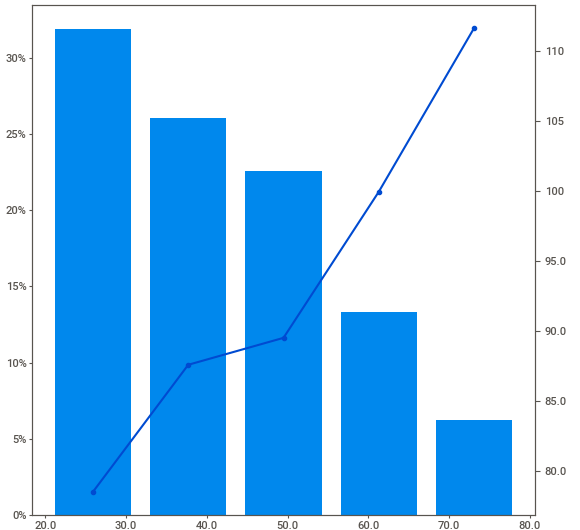
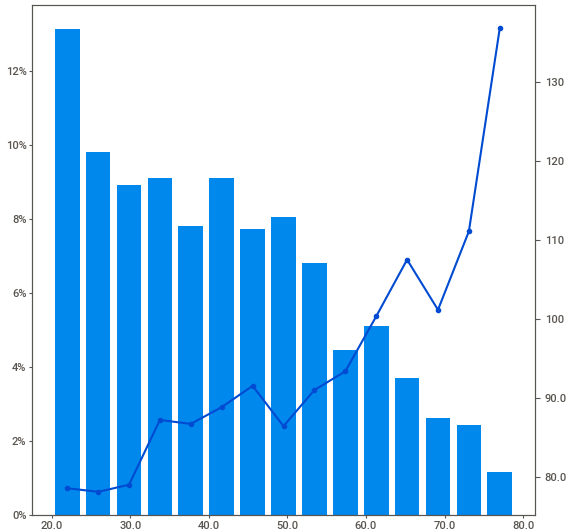
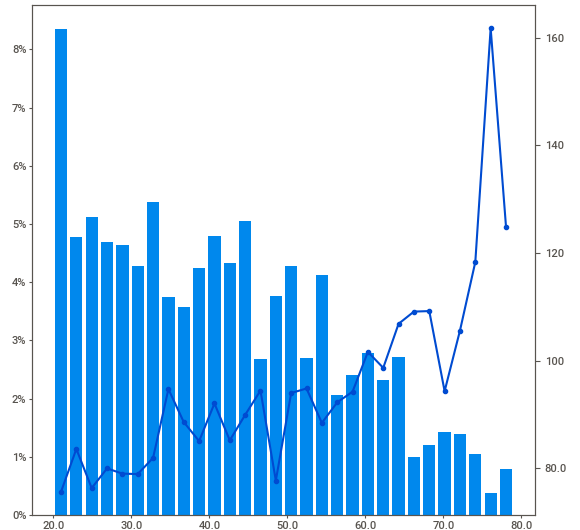
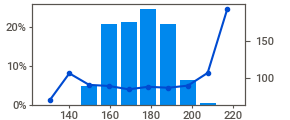
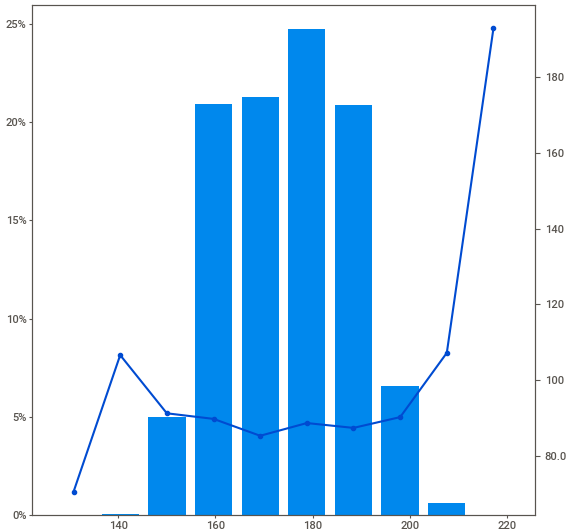
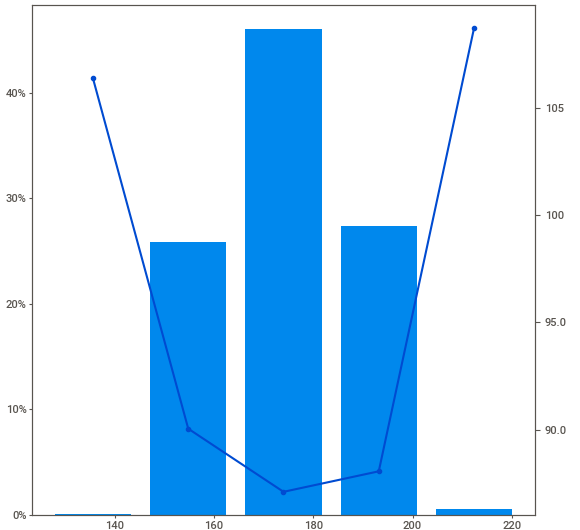
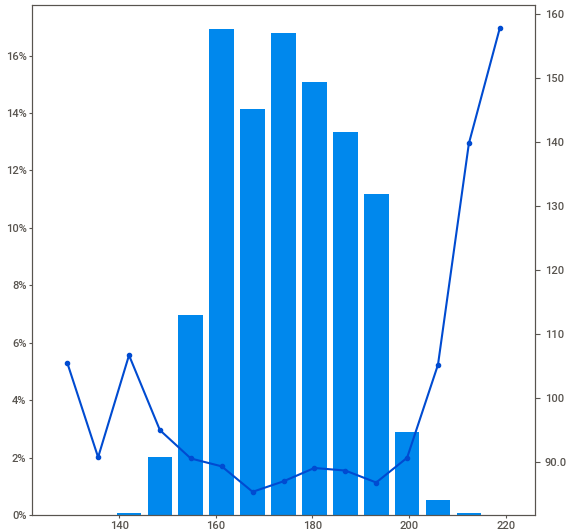
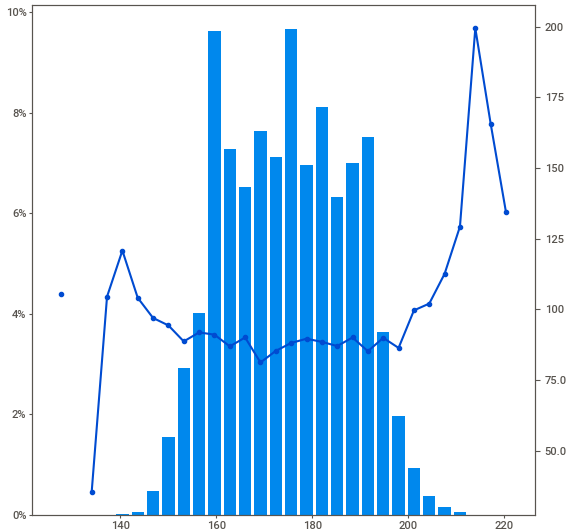
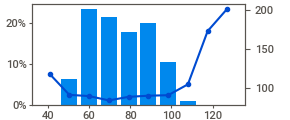
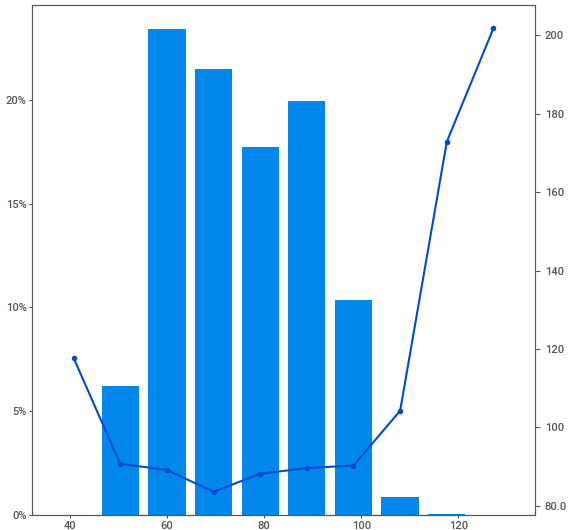
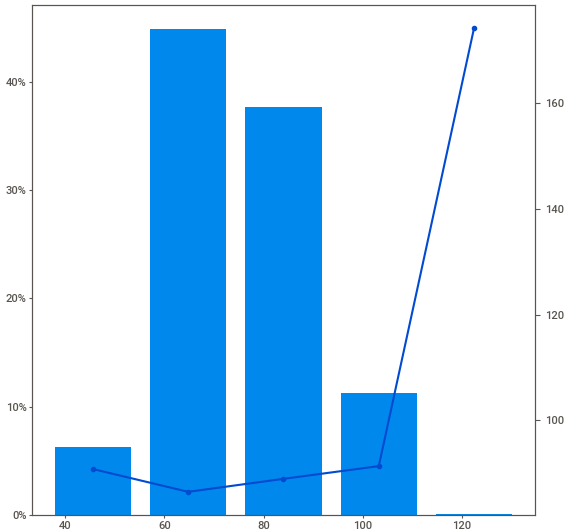
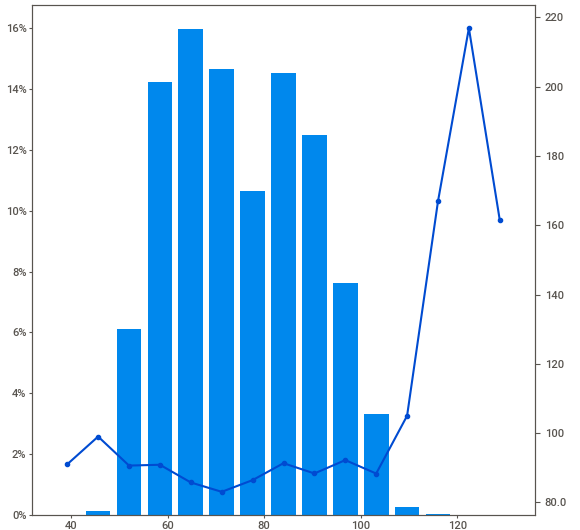
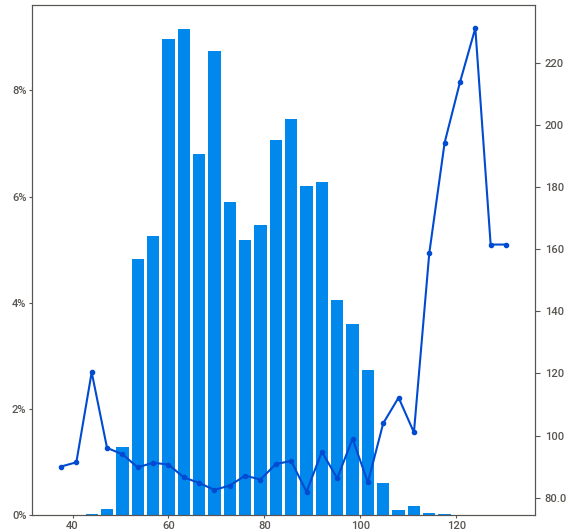
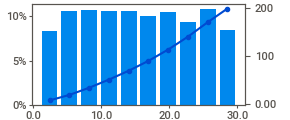
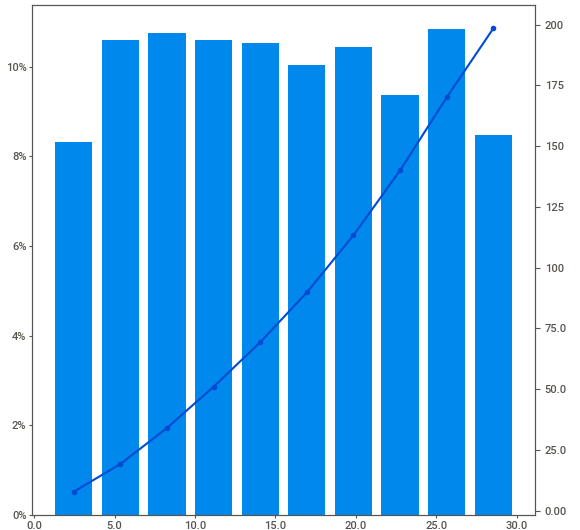
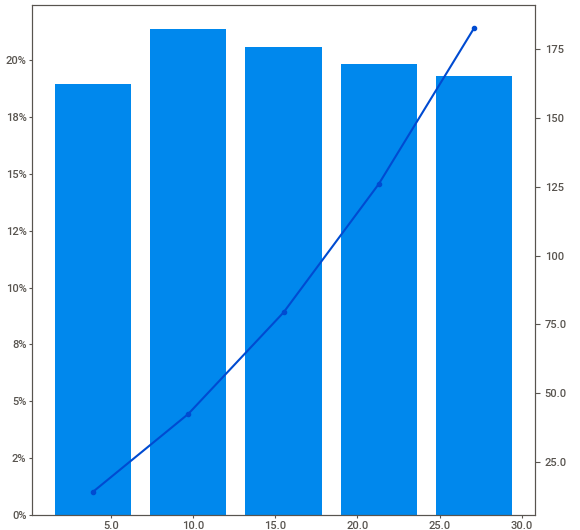
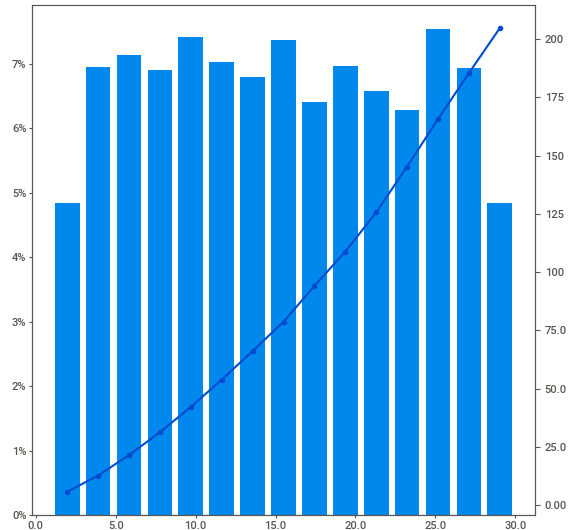
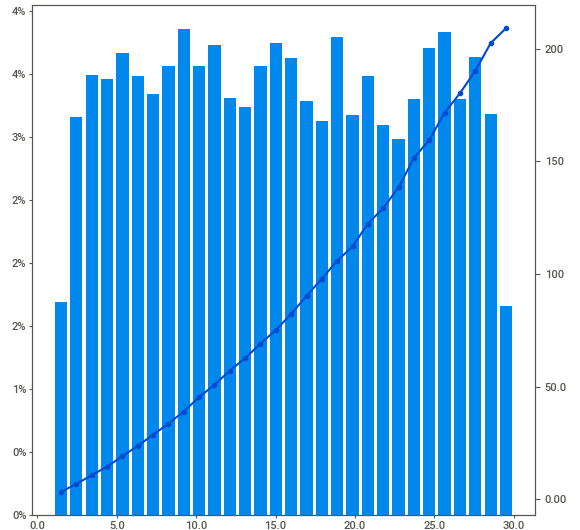
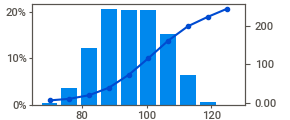
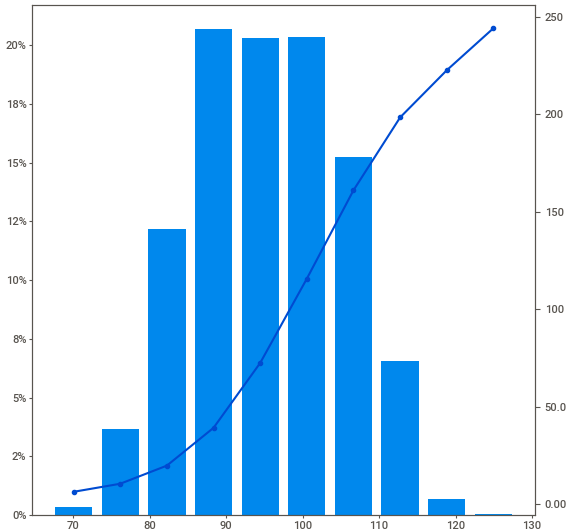
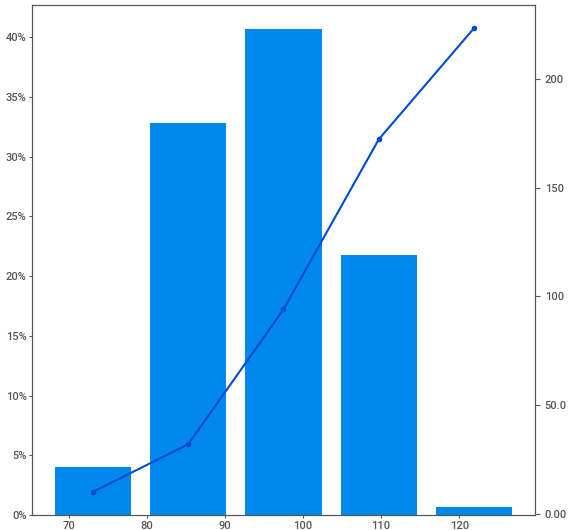
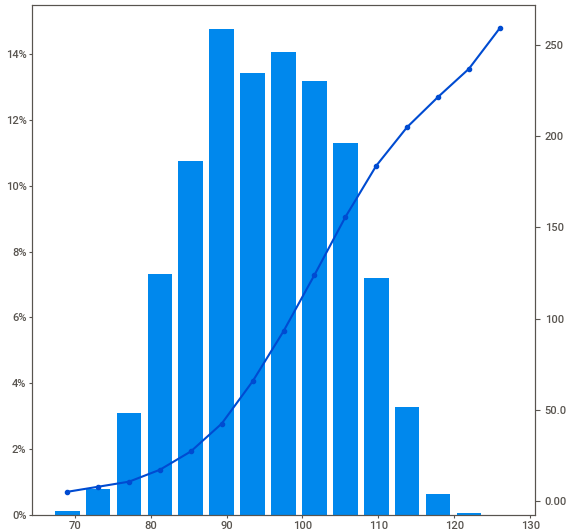
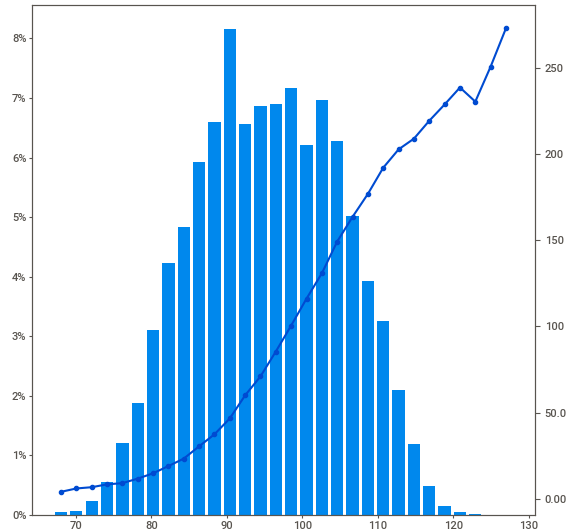
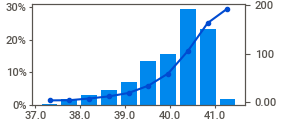
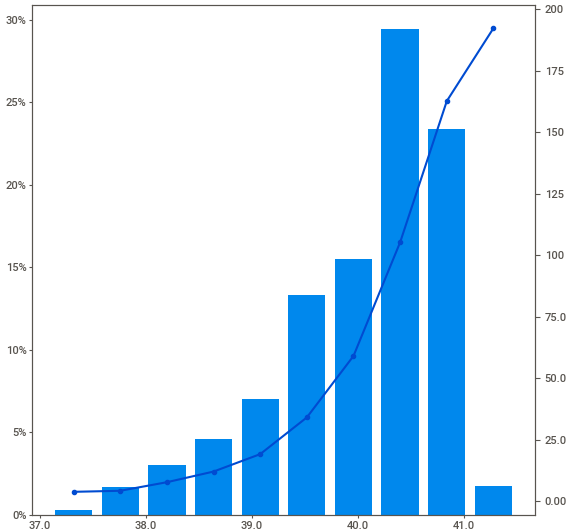
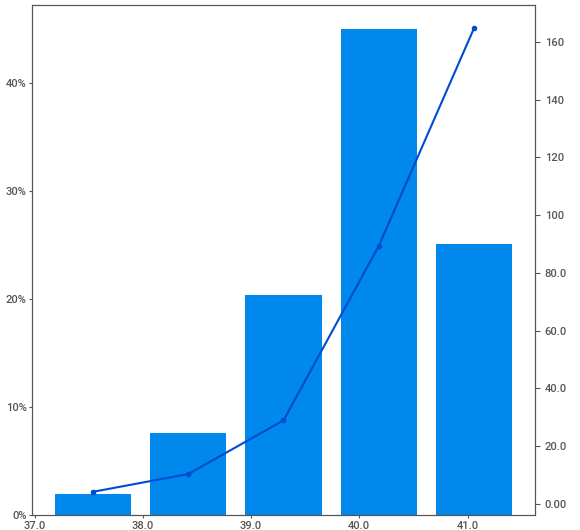
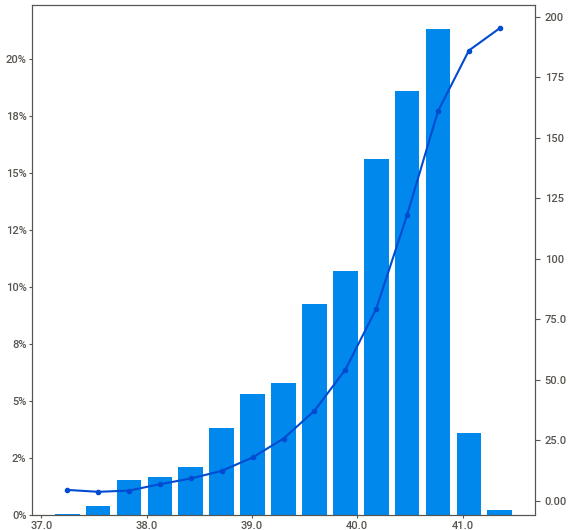
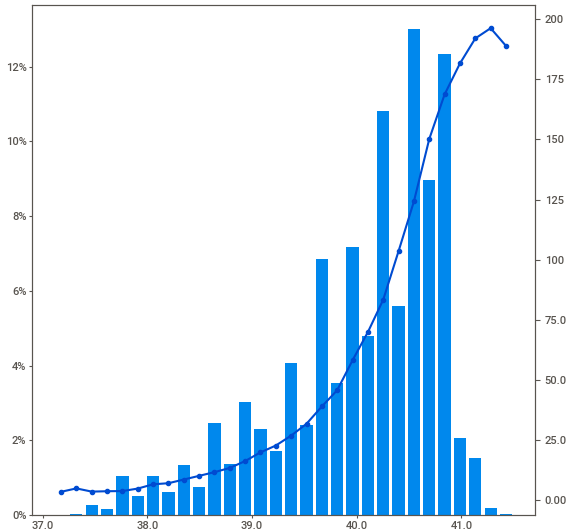
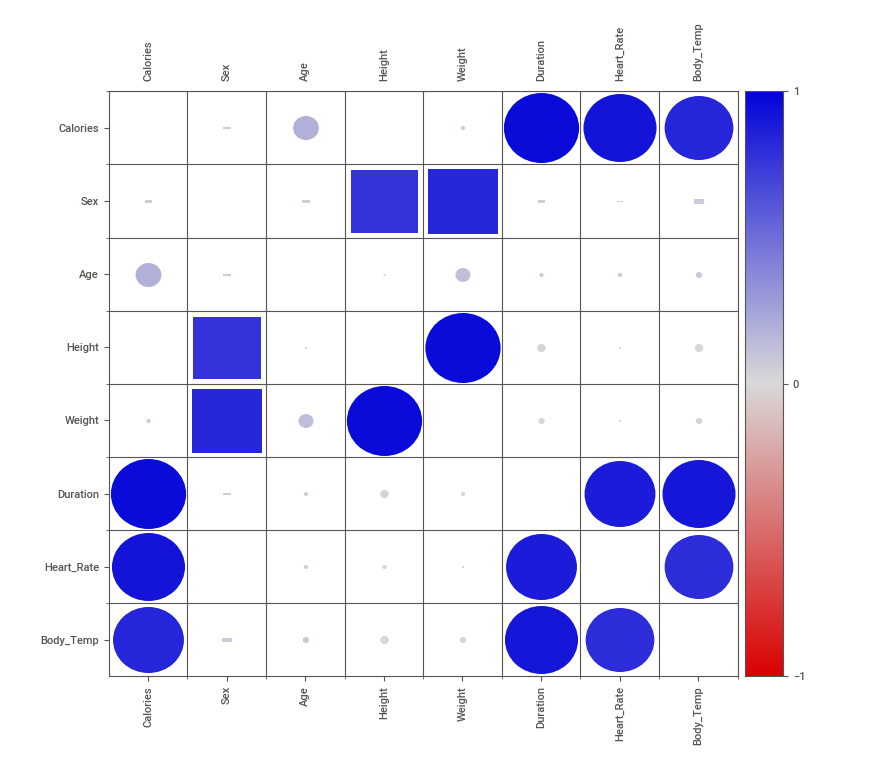
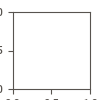

In [10]:
# We pass the data to the profiler

calories_report = sv.analyze([calories_train, "Train"], target_feat="Calories")

# We use the comparison function of the tool

#calories_compare = sv.compare(source=calories_train, compare=calories_test, target_feat="MedHouseVal")

# Get the full profile

calories_report.show_notebook(w="100%", h="full")

### Calories (Target variable)

Our target variable. Highly correlated with body temperature, heart rate, and duration. We found no null or erroneous values, with a positively skewed distribution. The average value is around 88 calories, with a range of values from 1 to 314, with the lowest values having a wider frequency.

### Sex

The only categorical variable we found in the data. We found no erroneous or missing values, and the distribution of values is almost 50/50 for each present value. The variable has a high correlation, as expected, with height and weight.

### Age

We found no null or erroneous values. The age range spans from 20 to 79 years, with a larger presence of lower values, and a skewed distribution to the right. The average age is around 40, and could be replaced by an age range variable.

### Height

No missing or erroneous values were found. The values are represented in centimeters, with an average height of 1.70 meters (the averages, minimums, and maximums by sex and age could be analyzed later). We found some potential outliers when, logically, we approached the minimum and maximum height values. We found a distribution that could be described as symmetrical, with almost the same mean and average values, and similar frequencies on the left and right. The height range is 126 to 222 centimeters, with a high correlation between height and sex.

### Weight

We found something similar with the height variable. There were no null or erroneous values, but we observed some outliers. The distribution is skewed with a small tail to the right. We took the values for this variable in kilograms, with a weight range of 36 to 132 kilos, with an average weight of 75 kg. It could also be separated into weight ranges. We found it logically correlated with sex and height.

### Duration

We will define this variable as the amount of time exercised in minutes. We found no null or erroneous values, and a possible symmetrical distribution, with a mean and average of around 15 minutes. The range of values spans from 1 to 30 minutes. We could separate it into exercise intensity categories (Low, Moderate, Intense). Logically, this is the variable most linearly correlated with calories expended.

### Heart_Rate

We find the variable heart rate, which measures the number of beats per minute. A normal heart rate at rest is between 60 and 100 beats per minute. The average heart rate during exercise depends on the intensity and type of activity. The target heart rate during moderate-intensity exercise is between 50% and 70% of the maximum heart rate, while for vigorous exercise it is 70% to 85%. We found no null or erroneous values, with a possible symmetrical distribution, with the mean and average around 95 beats per minute. The range of values is between 67 and 128 beats per minute. We could relate the variable to duration to expand the features. We found it highly correlated with duration and calories.

### Body_Temp

Average body temperature during intense exercise can temporarily rise to 40°C (104°F). The ideal temperature during exercise and competition is considered to be around 38.5°C. Normal resting body temperature ranges from 36.1°C (97°F) to 37.2°C (99°F). We found no null or erroneous values, and a left-tailed or negatively skewed distribution. The range of values is between 37 and 41 degrees Celsius, with the presence of possible outliers. We could obtain new variables from their relationship with duration, in addition to a possible separation into categories by temperature range. The variable is logically highly correlated with duration.

## Outlier Analysis

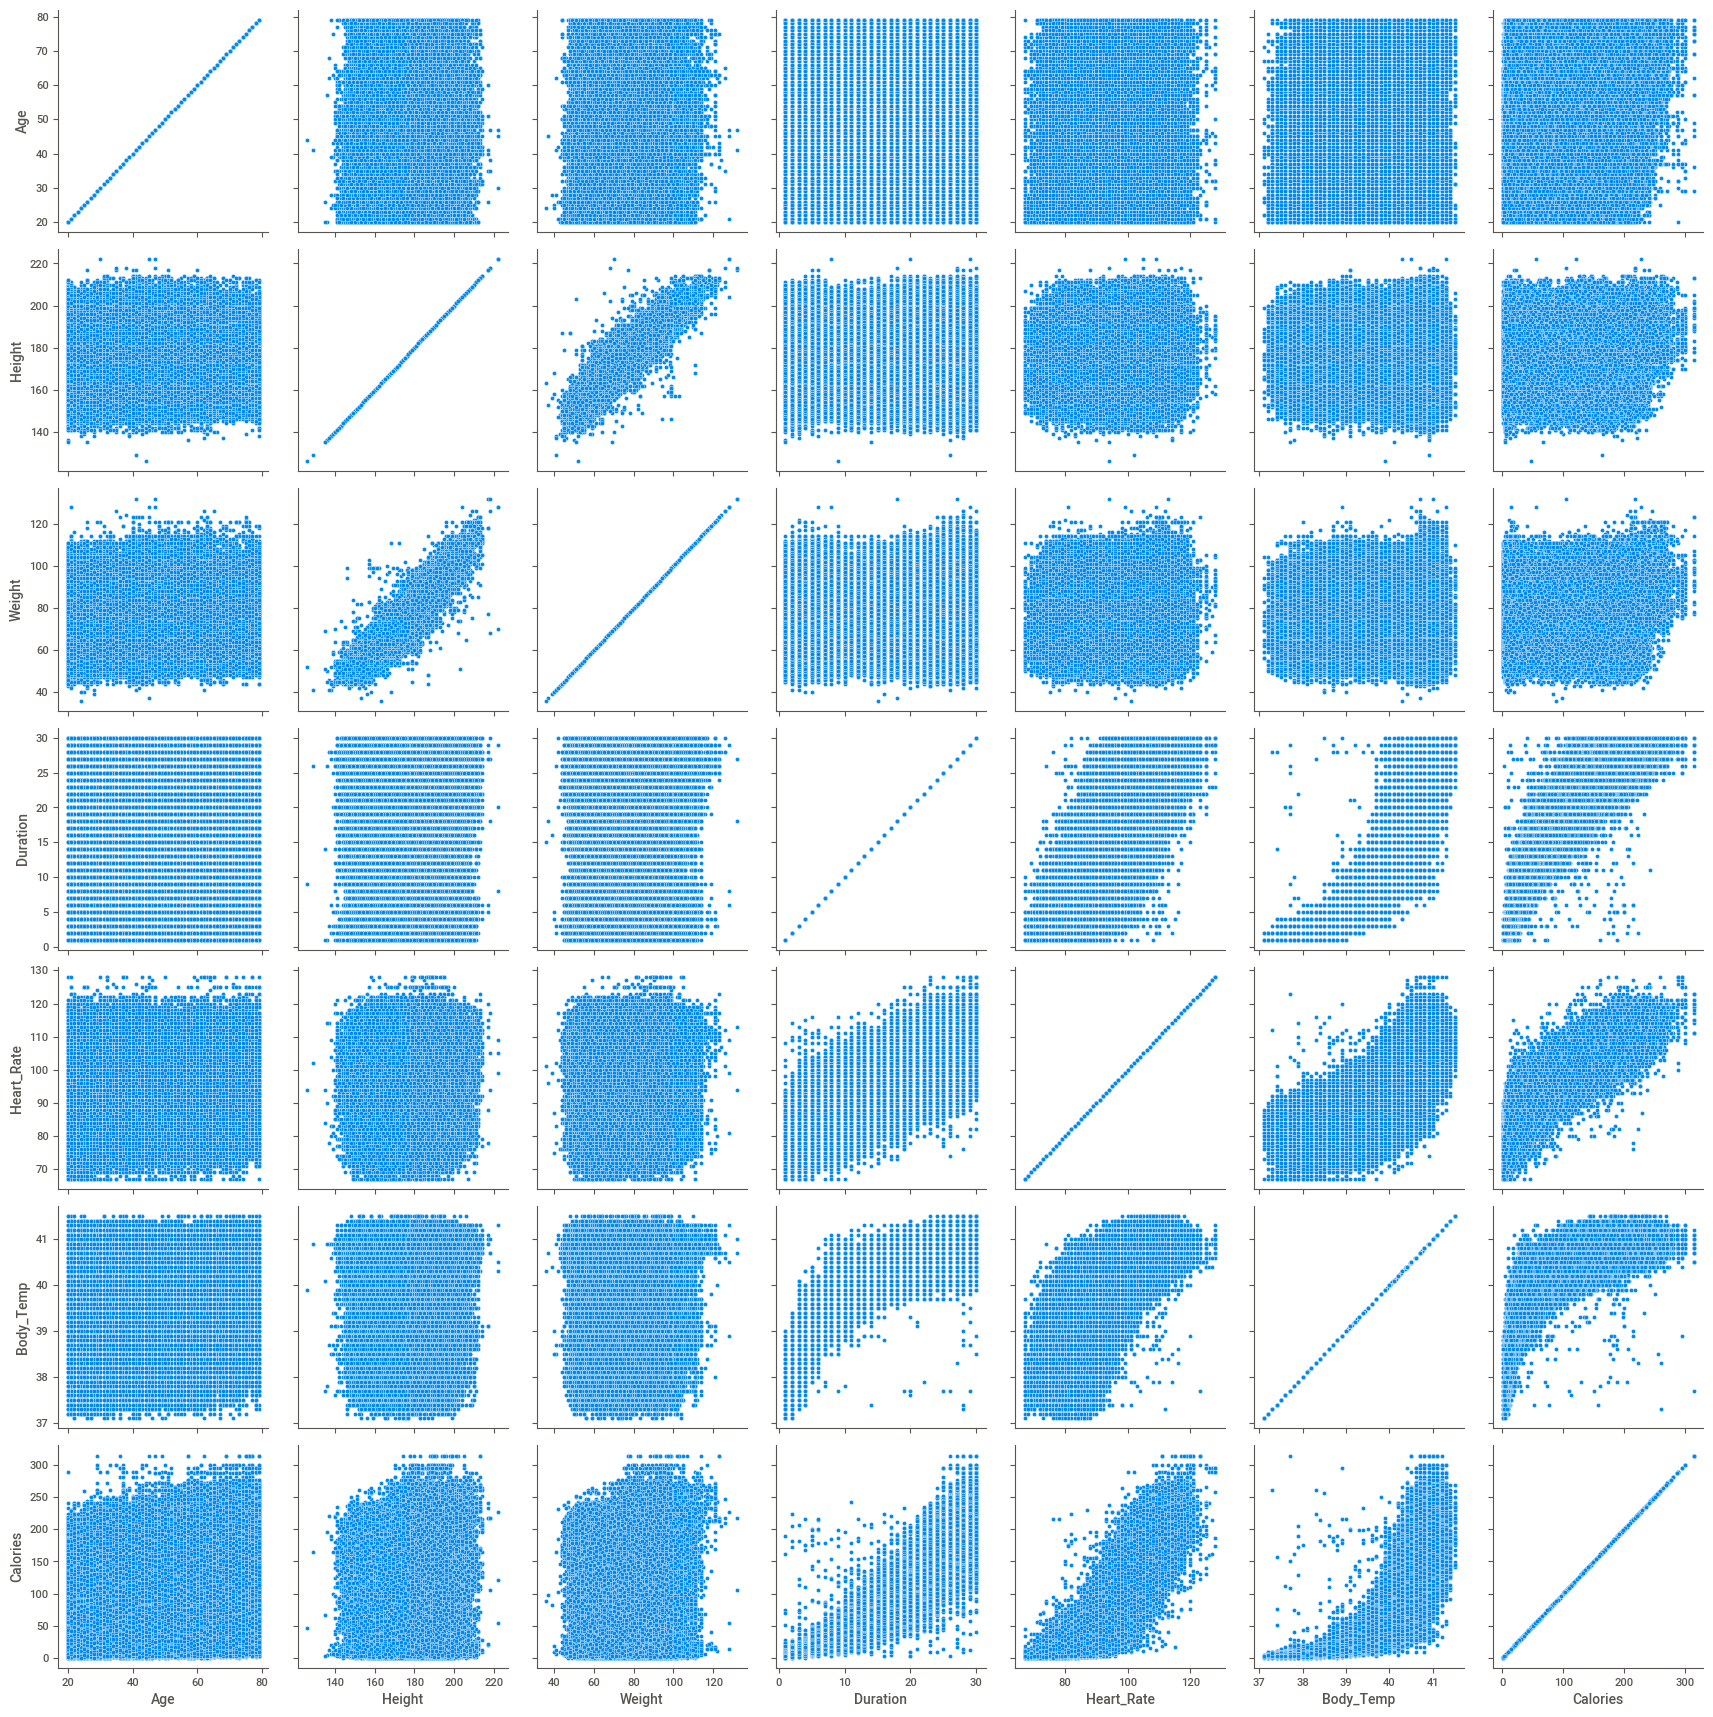

In [11]:
eval_out = sns.PairGrid(calories_train)
eval_out.map(sns.scatterplot)
#eval_out.map_upper(sns.scatterplot)
#eval_out.map_lower(sns.kdeplot)
#eval_out.map_diag(sns.kdeplot, lw=3, legend=False)

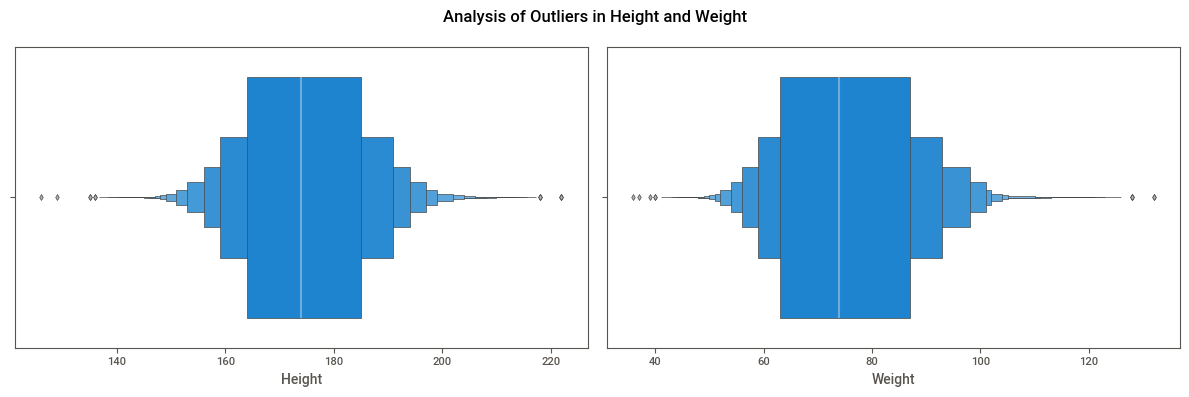

In [12]:
# We analyze the Height & Weight

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

sns.boxenplot(
    data=calories_train,
    x="Height", 
    linewidth=.5,
    line_kws=dict(linewidth=1.5, color="#cde"),
    flier_kws=dict(facecolor=".7", linewidth=.5),
    ax=axes[0]
)

sns.boxenplot(
    data=calories_train,
    x="Weight",
    linewidth=.5,
    line_kws=dict(linewidth=1.5, color="#cde"),
    flier_kws=dict(facecolor=".7", linewidth=.5),
    ax=axes[1]
)

plt.suptitle(t="Analysis of Outliers in Height and Weight")
plt.tight_layout()
plt.show()

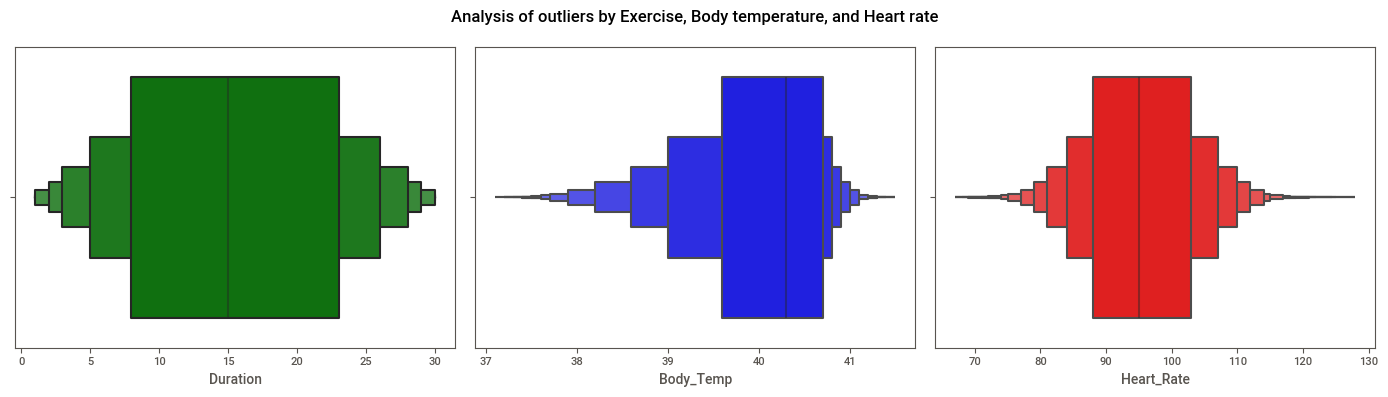

In [13]:
# We analyze the Height & Weight

fig, axes = plt.subplots(ncols=3, figsize=(14, 4))

sns.boxenplot(x=calories_train["Duration"], color="g", ax=axes[0])
sns.boxenplot(x=calories_train["Body_Temp"], color="b",ax=axes[1])
sns.boxenplot(x=calories_train["Heart_Rate"], color="r",ax=axes[2])

plt.suptitle(t="Analysis of outliers by Exercise, Body temperature, and Heart rate")
plt.tight_layout()
plt.show()

We found some outliers that we could handle with an upper threshold and lower threshold value and assign those same values to all data points above or below that threshold accordingly, or convert the features values into bins.

Next, we'll perform data cleaning where necessary, in addition to handling any duplicate values we find (representing 0.3% of the data). Later, as I mentioned previously, we'll likely expand the data analysis for each variable as we progress through our initial approach.

# Data wrangling

After our exploratory data analysis, we found no missing or erroneous data. We did find duplicate data, as well as possible outliers.

In [14]:
# We make a copy of the original dataset

calories_new = calories_train.copy()

In [15]:
# We confirm that there is no null values

null_values = pd.DataFrame(
        {f"Null Data" : calories_new.isnull().sum(), 
         "Percentage" : (calories_new.isnull().sum()) / (len(calories_new)) * (100)})

null_values

Null Data  Percentage
Sex                 0         0.0
Age                 0         0.0
Height              0         0.0
Weight              0         0.0
Duration            0         0.0
Heart_Rate          0         0.0
Body_Temp           0         0.0
Calories            0         0.0

## Outliers

In [16]:
# We replace with an upper threshold(95%) and lower threshold(5%) approximate value

calories_new["Height"] = calories_new["Height"].clip(lower=155.0, upper=200.0).round(decimals=1)
calories_new["Weight"] = calories_new["Weight"].clip(lower=50.0, upper=110.0).round(decimals=1)
calories_new["Heart_Rate"] = calories_new["Heart_Rate"].clip(lower=75.0, upper=115.0).round(decimals=1)
calories_new["Body_Temp"] = calories_new["Body_Temp"].clip(lower=38.00, upper=41.00).round(decimals=1)

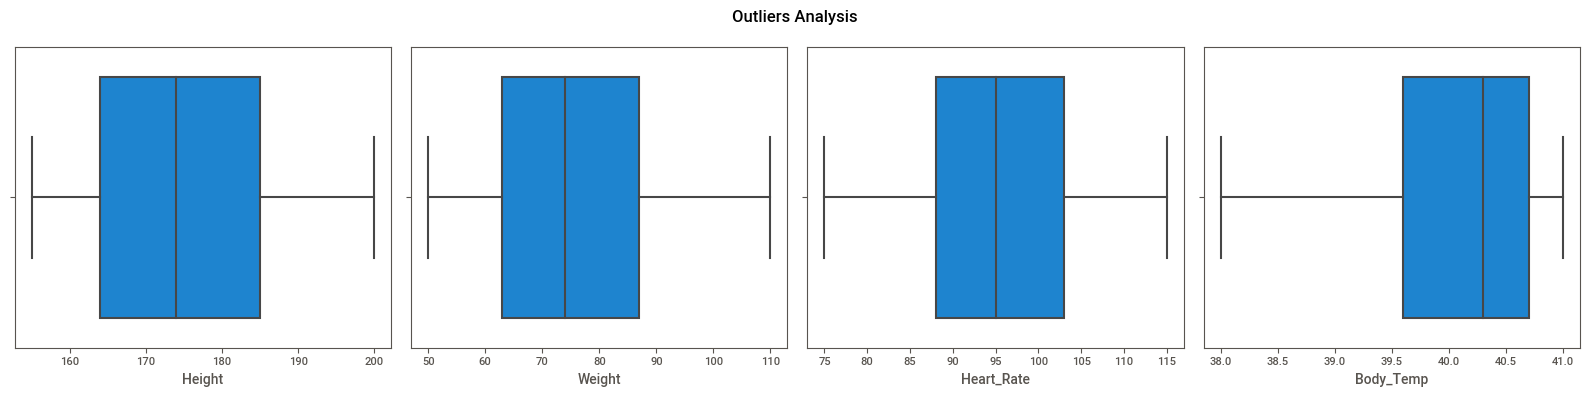

In [17]:
fig, axes = plt.subplots(ncols=4, figsize=(16, 4))

sns.boxplot(x=calories_new["Height"], ax=axes[0])
sns.boxplot(x=calories_new["Weight"], ax=axes[1])
sns.boxplot(x=calories_new["Heart_Rate"], ax=axes[2])
sns.boxplot(x=calories_new["Body_Temp"], ax=axes[3])

plt.suptitle(t="Outliers Analysis")
plt.tight_layout()
plt.show()

## Duplicates

In [18]:
# We check the duplicate data found

print(f"Length: {len(calories_new.duplicated())}")
print(f"Duplicates: {calories_new.duplicated().sum()}")

Length: 750000
Duplicates: 3729


In [19]:
# Removing duplicates and keeping the first occurrence

calories_new.drop_duplicates(inplace=True)

# We check that no duplicate data is found

print(f"Length: {len(calories_new.duplicated())}")
print(f"Duplicates: {calories_new.duplicated().sum()}")

Length: 746271
Duplicates: 0


In [20]:
calories_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 746271 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         746271 non-null  object 
 1   Age         746271 non-null  int64  
 2   Height      746271 non-null  float64
 3   Weight      746271 non-null  float64
 4   Duration    746271 non-null  float64
 5   Heart_Rate  746271 non-null  float64
 6   Body_Temp   746271 non-null  float64
 7   Calories    746271 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.2+ MB


We'll keep this initial cleanup simple. After our first run-through, we'll try handling the data differently if necessary. Next we will pose some interesting questions to explore the data in greater depth.

# Hypotheses & Questions of Interest

We'll attempt a more in-depth analysis, not so much trying to understand the variables themselves, but rather the data as a whole, analyzing the information it contains. We'll ask some questions to help us better understand how the data are related and their importance.

In [21]:
# Establishing the seaborn aesthetic

sns.set_style("dark")

- What are the differences in calorie expenditure by sex?
- How much does a person's age influence calorie expenditure?

In [22]:
gender_ce = calories_new.pivot(columns="Sex", values="Calories")

gender_ce.describe().T

count       mean        std  min   25%   50%    75%    max
Sex                                                                  
female  373807.0  87.648974  57.897258  1.0  37.0  80.0  134.0  300.0
male    372464.0  89.164158  66.542895  1.0  32.0  74.0  138.0  314.0

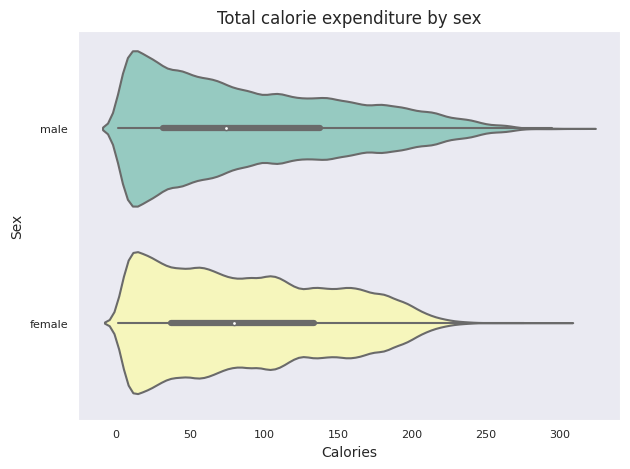

In [23]:
# We analyze the Gender

sns.violinplot(
    data=calories_new, 
    x="Calories",
    y="Sex",
    estimator="sum",
    palette="Set3",
    edgecolor="k"
)

plt.title(label="Total calorie expenditure by sex")
plt.tight_layout()
plt.show()

We didn't find any significant differences in calorie expenditure by gender. One possibility could be the distribution of the dataset values, which were almost identical for each value. We can observe a small, but not significant, difference at the average and maximum values, giving a higher calorie expenditure percentage for men. We'll analyze the amount of exercise time later to examine the gender differences in more depth.

In [24]:
sex_ce = calories_new.pivot(columns="Age", values="Calories")

sex_ce.describe()

Age              20            21            22            23            24  \
count  26085.000000  36064.000000  21187.000000  14605.000000  17747.000000   
mean      69.612191     80.244205     83.744844     83.478740     72.889446   
std       51.299073     55.210056     57.191283     54.422248     56.084098   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       24.000000     30.000000     32.000000     35.000000     24.000000   
50%       60.000000     75.000000     76.000000     78.000000     60.000000   
75%      108.000000    124.000000    129.000000    128.000000    114.000000   
max      289.000000    230.000000    240.000000    240.000000    230.000000   

Age              25            26            27            28            29  \
count  20482.000000  20672.000000  14437.000000  17989.000000  16735.000000   
mean      79.690313     80.763690     79.281222     79.030241     79.163490   
std       58.436709     56.373637     54.197232     57.973901     55.168145   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%       24.000000     31.000000     33.000000     26.000000     32.000000   
50%       71.000000     74.000000     72.000000     67.000000     70.000000   
75%      129.000000    125.000000    119.000000    125.000000    118.000000   
max      259.000000    243.000000    250.000000    251.000000    314.000000   

Age    ...           70           71           72           73           74  \
count  ...  3968.000000  6732.000000  5001.000000  5451.000000  3791.000000   
mean   ...    97.002268    92.723708   101.438712   109.352229   104.137431   
std    ...    79.334599    63.690435    76.921806    78.400596    71.211175   
min    ...     2.000000     3.000000     2.000000     1.000000     3.000000   
25%    ...    28.750000    44.000000    39.000000    43.000000    46.000000   
50%    ...    65.000000    79.000000    79.000000    87.000000    77.000000   
75%    ...   171.250000   126.000000   171.000000   182.000000   166.000000   
max    ...   300.000000   300.000000   300.000000   314.000000   300.000000   

Age             75           76           77           78           79  
count  4032.000000  1078.000000  1706.000000  1606.000000  4273.000000  
mean    131.508929   169.916512   156.632474   141.610834   118.536859  
std      72.751593    80.708909    81.320454    85.887073    72.786034  
min       2.000000     5.000000     3.000000     2.000000     4.000000  
25%      66.000000   106.250000    76.000000    55.000000    53.000000  
50%     144.000000   185.000000   182.000000   165.000000   105.000000  
75%     179.000000   242.000000   222.000000   216.000000   181.000000  
max     314.000000   314.000000   314.000000   295.000000   314.000000  

[8 rows x 60 columns]

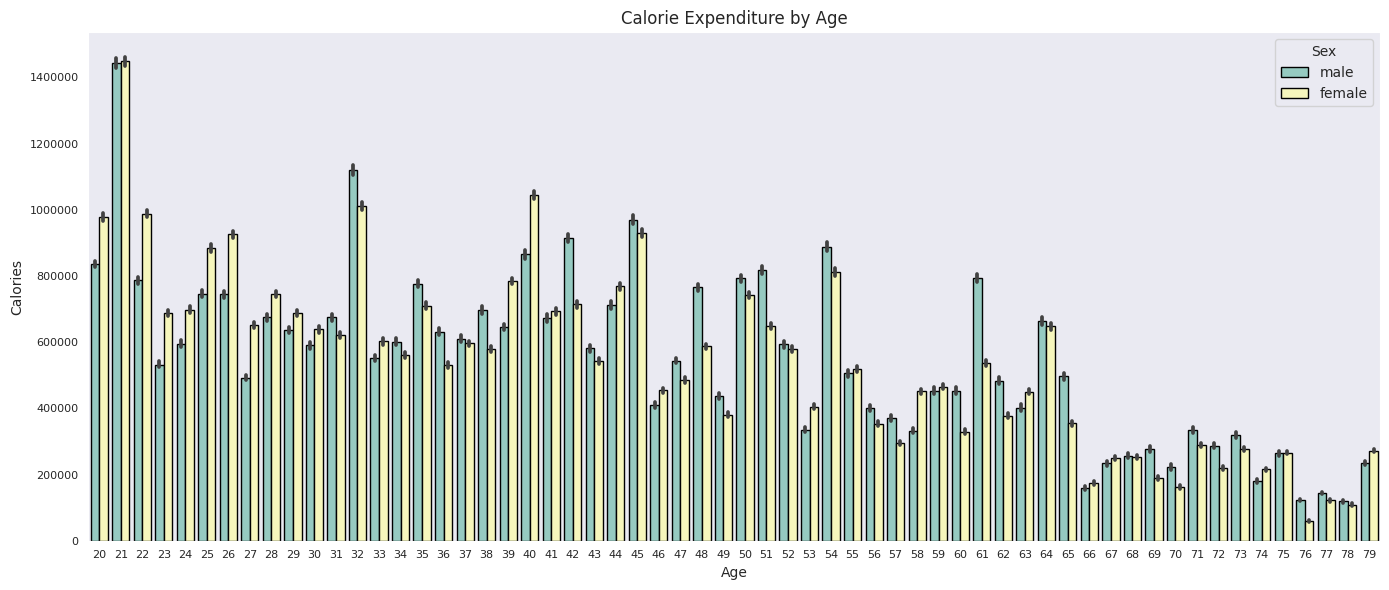

In [25]:
# We analyze the Age

fig, axes = plt.subplots(figsize=(14, 6))

sns.barplot(
    data=calories_new, 
    x="Age",
    y="Calories",
    estimator="sum",
    hue="Sex",
    palette="Set3",
    edgecolor="k"
)

plt.title(label="Calorie Expenditure by Age")
plt.tight_layout()
plt.show()

As might be expected, we found higher calorie expenditure in young people. However, we didn't find significant differences in the overall age average. Separating these into age groups could be a good option.

- Is height or weight an important factor in calorie expenditure?
- How much does height and weight influence calorie expenditure by gender?

In [26]:
height_ce = calories_new.pivot(columns="Height", values="Calories")

height_ce.describe()

Height         155.0         156.0         157.0         158.0         159.0  \
count   44190.000000  11670.000000  11611.000000  18154.000000  14136.000000   
mean       91.547703     94.607969     89.988201     96.695384     91.358093   
std        59.719316     59.113756     59.904210     57.453256     57.635956   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%        38.000000     42.000000     34.000000     49.000000     41.000000   
50%        86.000000     89.500000     84.000000     95.000000     85.000000   
75%       142.000000    143.000000    141.000000    141.000000    137.000000   
max       261.000000    241.000000    261.000000    264.000000    259.000000   

Height         160.0         161.0         162.0         163.0         164.0  \
count   13149.000000  26048.000000  16314.000000  18057.000000  20085.000000   
mean       84.582706     90.596092     88.752237     85.909010     86.639183   
std        56.700566     55.319483     58.435889     57.487904     57.481231   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%        33.000000     50.000000     38.000000     34.000000     36.000000   
50%        80.000000     76.000000     79.000000     79.000000     79.000000   
75%       127.000000    134.000000    137.000000    128.000000    130.000000   
max       238.000000    243.000000    264.000000    272.000000    256.000000   

Height  ...         191.0         192.0         193.0         194.0  \
count   ...  17563.000000  13572.000000  13181.000000  11795.000000   
mean    ...     86.818368     80.617963     80.406494     79.655871   
std     ...     66.051839     68.691284     64.357394     62.023190   
min     ...      1.000000      1.000000      1.000000      1.000000   
25%     ...     32.000000     17.000000     25.000000     28.000000   
50%     ...     72.000000     61.000000     63.000000     65.000000   
75%     ...    131.000000    132.000000    126.000000    121.000000   
max     ...    314.000000    300.000000    300.000000    314.000000   

Height        195.0        196.0        197.0        198.0        199.0  \
count   7180.000000  8267.000000  5910.000000  3920.000000  4837.000000   
mean      93.790390   101.924640    81.689509    98.653316    83.184205   
std       66.683694    72.741206    64.503773    69.517122    67.454382   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%       37.000000    38.000000    23.000000    35.000000    24.000000   
50%       82.000000    86.000000    67.000000    90.000000    68.000000   
75%      142.250000   165.000000   123.000000   152.000000   129.000000   
max      314.000000   314.000000   300.000000   314.000000   314.000000   

Height         200.0  
count   11305.000000  
mean      103.239275  
std        73.819940  
min         1.000000  
25%        31.000000  
50%        99.000000  
75%       154.000000  
max       314.000000  

[8 rows x 46 columns]

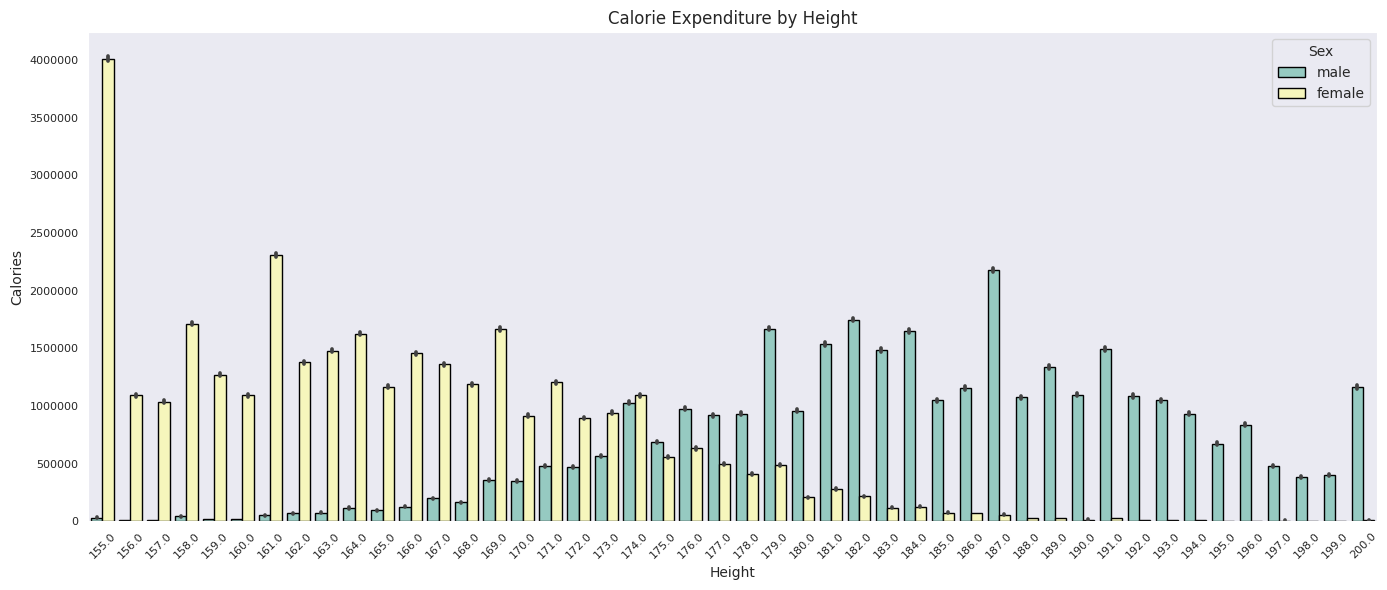

In [27]:
# We analyze the Age

fig, axes = plt.subplots(figsize=(14, 6))

sns.barplot(
    data=calories_new, 
    x="Height",
    y="Calories",
    estimator="sum",
    hue="Sex",
    palette="Set3",
    edgecolor="k"
).tick_params(axis='x', labelrotation=45)

plt.title(label="Calorie Expenditure by Height")
plt.tight_layout()
plt.show()

We found that, on average, calorie expenditure by height falls within the same range; it's at the highest values where we begin to observe an increase. Analyzing the graph, we can see, as expected, that the values for men have a negative skewness, with a tail to the left, and a positive skewness for women. In the center of the graph, where we can see the average height values, calorie expenditure is similar for both.

In [28]:
weight_ce = calories_new.pivot(columns="Weight", values="Calories")

weight_ce.describe()

Weight        50.0         51.0         52.0         53.0          54.0   \
count   4438.000000  5989.000000  6630.000000  5220.000000  13233.000000   
mean      98.324020    92.042244    98.552640    88.990805     82.050782   
std       63.522269    62.791520    57.972805    57.936552     54.550629   
min        1.000000     1.000000     1.000000     1.000000      1.000000   
25%       35.000000    34.000000    44.000000    36.750000     35.000000   
50%      101.000000    85.000000   100.000000    84.000000     74.000000   
75%      156.000000   150.000000   146.000000   139.000000    118.000000   
max      242.000000   252.000000   242.000000   249.000000    240.000000   

Weight         55.0          56.0          57.0          58.0          59.0   \
count   10799.000000  12640.000000  12054.000000  14699.000000  18638.000000   
mean       94.953144     95.085443     94.772524     85.077828     87.007619   
std        59.340573     60.142713     60.968261     57.472962     60.795976   
min         1.000000      1.000000      1.000000      1.000000      1.000000   
25%        42.000000     39.000000     40.000000     33.000000     31.000000   
50%        92.000000     94.000000     90.000000     78.000000     78.000000   
75%       145.000000    147.000000    147.000000    129.000000    138.000000   
max       256.000000    247.000000    261.000000    256.000000    264.000000   

Weight  ...        101.0        102.0        103.0        104.0       105.0  \
count   ...  6151.000000  7956.000000  3379.000000  3491.000000  532.000000   
mean    ...    78.168590    83.909879    97.035513    93.627614  143.308271   
std     ...    62.516191    66.165566    64.736309    67.925870   83.995398   
min     ...     1.000000     1.000000     2.000000     1.000000    2.000000   
25%     ...    23.000000    21.000000    42.000000    29.000000   63.750000   
50%     ...    64.000000    70.000000    89.000000    83.000000  162.000000   
75%     ...   112.000000   135.000000   143.000000   144.000000  218.250000   
max     ...   300.000000   314.000000   314.000000   295.000000  314.000000   

Weight       106.0       107.0       108.0       109.0        110.0  
count   433.000000  293.000000  221.000000  192.000000  1654.000000  
mean    140.071594  122.744027   97.393665  112.927083   118.603990  
std      88.381365   89.198213   92.532322   90.027598    90.026082  
min       2.000000    1.000000    3.000000    2.000000     1.000000  
25%      43.000000   18.000000   14.000000   19.750000    19.000000  
50%     164.000000  137.000000   30.000000   98.000000   129.000000  
75%     220.000000  213.000000  202.000000  193.000000   207.000000  
max     276.000000  314.000000  268.000000  266.000000   314.000000  

[8 rows x 61 columns]

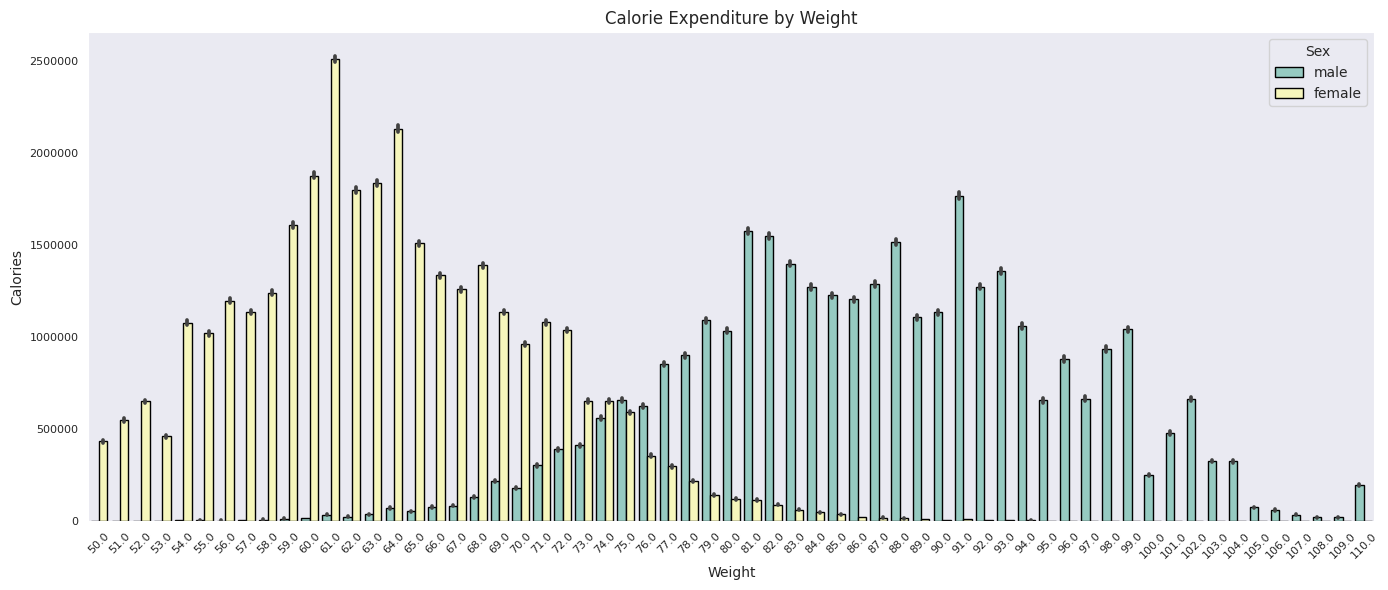

In [29]:
# We analyze the Age

fig, axes = plt.subplots(figsize=(14, 6))

sns.barplot(
    data=calories_new, 
    x="Weight",
    y="Calories",
    estimator="sum",
    hue="Sex",
    palette="Set3",
    edgecolor="k"
).tick_params(axis='x', labelrotation=45)

plt.title(label="Calorie Expenditure by Weight")
plt.tight_layout()
plt.show()

Unlike height, we find different averages across the board, with the person's calorie expenditure being higher as the weight increases. Regarding the maximum and minimum values, we see a similar difference as with height, but less pronounced. Looking at the graph, we can observe the same logic as with height: a negative skewness for men, a positive skewness for women, and the same values when analyzing the average weight for both.

- What is the average calorie expenditure for the duration of exercise?
- What differences do we find in exercise duration by age and sex?

In [30]:
duration_ce = calories_new.pivot(columns="Duration", values="Calories")

duration_ce.describe()

Duration          1.0           2.0           3.0           4.0   \
count     12163.000000  23364.000000  25979.000000  25792.000000   
mean          3.365206      6.840353     10.757843     14.510623   
std           2.683731      3.117390      3.300240      4.115830   
min           1.000000      1.000000      2.000000      1.000000   
25%           3.000000      6.000000      9.000000     12.000000   
50%           3.000000      7.000000     11.000000     15.000000   
75%           4.000000      8.000000     12.000000     17.000000   
max         189.000000    223.000000    207.000000    215.000000   

Duration          5.0           6.0           7.0           8.0   \
count     27296.000000  26028.000000  24977.000000  26680.000000   
mean         19.147055     23.766213     28.694159     33.602211   
std           5.034964      5.721345      5.995570      6.967874   
min           3.000000      3.000000      6.000000      4.000000   
25%          17.000000     21.000000     25.000000     29.000000   
50%          19.000000     24.000000     29.000000     34.000000   
75%          22.000000     27.000000     32.000000     38.000000   
max         200.000000    215.000000    178.000000    184.000000   

Duration          9.0           10.0  ...          21.0          22.0  \
count     28693.000000  26597.000000  ...  26007.000000  23152.000000   
mean         38.991670     45.404256  ...    122.389818    129.294186   
std           7.726277      8.560296  ...     17.022566     17.726710   
min           7.000000      5.000000  ...     15.000000     42.000000   
25%          34.000000     41.000000  ...    112.000000    118.000000   
50%          40.000000     46.000000  ...    121.000000    129.000000   
75%          44.000000     51.000000  ...    132.000000    140.000000   
max         198.000000    195.000000  ...    221.000000    235.000000   

Duration          23.0          24.0          25.0          26.0  \
count     22307.000000  24708.000000  27676.000000  28683.000000   
mean        138.501322    151.531771    159.562365    171.606945   
std          18.641744     21.545446     22.489273     23.639101   
min          10.000000     10.000000     15.000000      3.000000   
25%         127.000000    137.000000    145.000000    156.000000   
50%         138.000000    149.000000    157.000000    168.000000   
75%         149.000000    164.000000    172.000000    184.000000   
max         241.000000    264.000000    295.000000    314.000000   

Duration          27.0          28.0          29.0          30.0  
count     24684.000000  27134.000000  23758.000000  12431.000000  
mean        180.259277    190.179996    202.387028    209.081409  
std          25.484403     25.147583     26.776140     26.729417  
min          18.000000     10.000000     13.000000     41.000000  
25%         163.000000    173.000000    185.000000    192.000000  
50%         178.000000    187.000000    200.000000    207.000000  
75%         194.000000    203.000000    217.000000    225.000000  
max         314.000000    314.000000    314.000000    314.000000  

[8 rows x 30 columns]

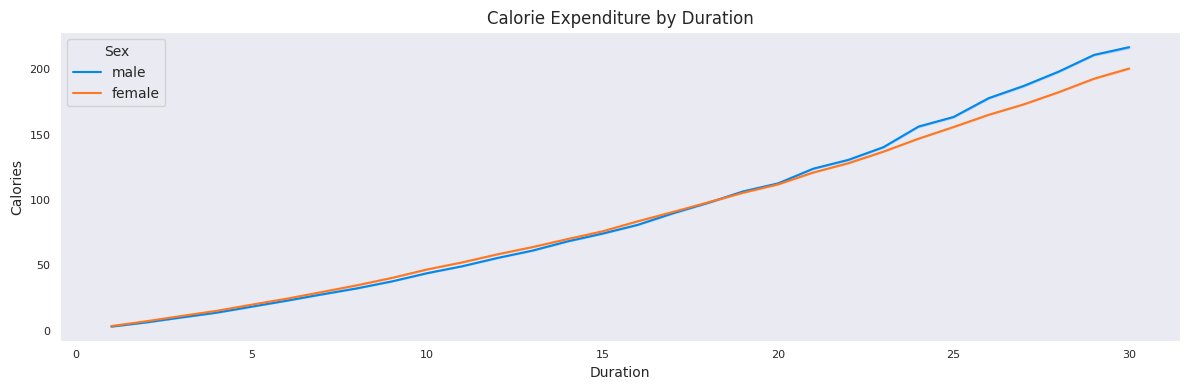

In [31]:
# We analyze the duration & calorie expenditure

fig, axes = plt.subplots(figsize=(12, 4))

sns.lineplot(
    data=calories_new, 
    x="Duration",
    y="Calories",
    hue="Sex"
)

plt.title(label="Calorie Expenditure by Duration")
plt.tight_layout()
plt.show()

Logically, the relationship between these variables is linear: the more exercise, the greater the calorie expenditure, although other factors, such as weight or height, should be influential in identifying possible discrepancies.

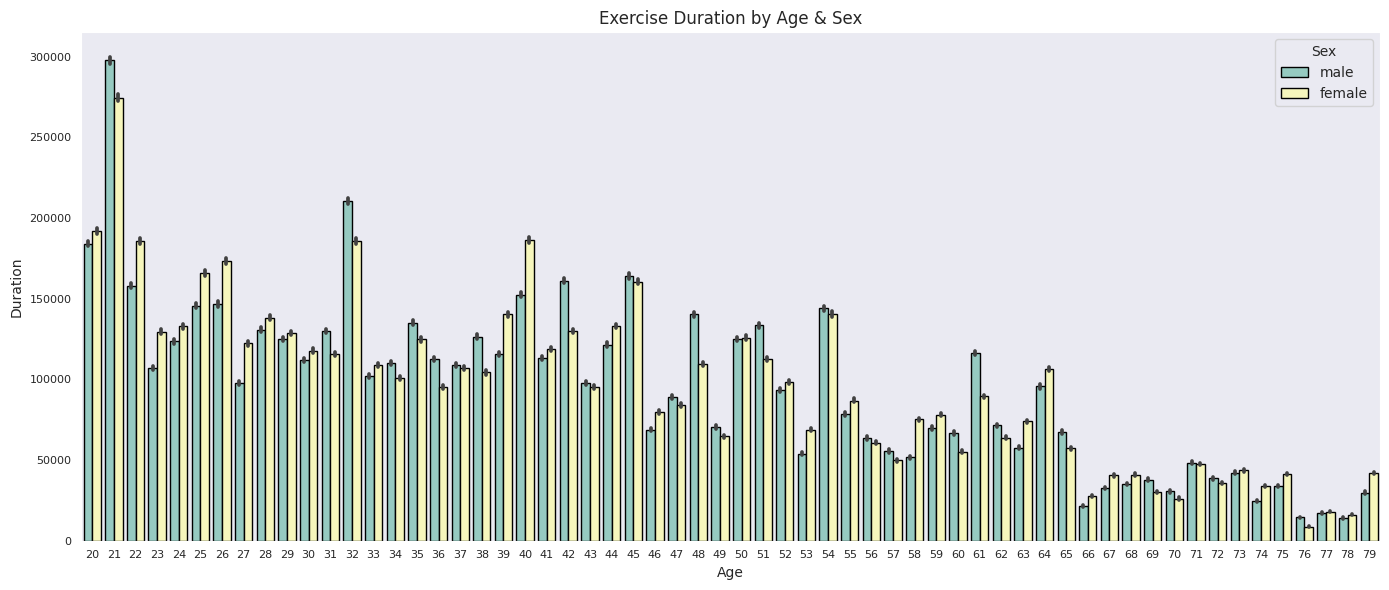

In [32]:
# We analyze the Age

fig, axes = plt.subplots(figsize=(14, 6))

sns.barplot(
    data=calories_new, 
    x="Age",
    y="Duration",
    estimator="sum",
    hue="Sex",
    palette="Set3",
    edgecolor="k"
)

plt.title(label="Exercise Duration by Age & Sex")
plt.tight_layout()
plt.show()

We didn't observe significant differences between genders; we found that both men and women maintained a similar average duration of exercise. What we did see was that age was an important factor in determining the duration of exercise. Younger people tended to do longer workouts.

- How does exercise impact heart rate and body temperature, is gender a factor?
- What are the average temperatures and heart rate for each duration?

In [33]:
duration_hr = calories_new.pivot(columns="Heart_Rate", values="Duration")

duration_hr.describe()

Heart_Rate        75.0         76.0         77.0         78.0         79.0   \
count       6673.000000  4005.000000  4946.000000  5662.000000  8351.000000   
mean           3.055297     3.220724     3.497978     3.885906     4.028500   
std            2.056698     2.108264     2.356433     2.510050     2.493182   
min            1.000000     1.000000     1.000000     1.000000     1.000000   
25%            2.000000     2.000000     2.000000     2.000000     2.000000   
50%            2.000000     3.000000     3.000000     3.000000     4.000000   
75%            4.000000     4.000000     4.750000     5.000000     5.000000   
max           26.000000    28.000000    25.000000    25.000000    25.000000   

Heart_Rate        80.0          81.0          82.0          83.0   \
count       8901.000000  14034.000000  15852.000000  15672.000000   
mean           4.640827      4.554510      5.305198      5.565722   
std            2.859731      2.781488      2.995291      3.186764   
min            1.000000      1.000000      1.000000      1.000000   
25%            3.000000      2.000000      3.000000      3.000000   
50%            4.000000      4.000000      5.000000      5.000000   
75%            6.000000      6.000000      7.000000      7.000000   
max           29.000000     26.000000     30.000000     26.000000   

Heart_Rate        84.0   ...         106.0         107.0         108.0  \
count       16825.00000  ...  17864.000000  19744.000000  16885.000000   
mean            5.74627  ...     24.642017     25.175294     25.876281   
std             3.29216  ...      3.547060      3.145015      3.042681   
min             1.00000  ...      2.000000      3.000000      1.000000   
25%             3.00000  ...     23.000000     23.000000     24.000000   
50%             5.00000  ...     25.000000     26.000000     26.000000   
75%             8.00000  ...     27.000000     28.000000     28.000000   
max            25.00000  ...     30.000000     30.000000     30.000000   

Heart_Rate         109.0         110.0         111.0        112.0  \
count       12551.000000  12914.000000  11461.000000  8793.000000   
mean           25.739463     26.743689     26.729430    27.192540   
std             3.090611      2.670785      2.668247     2.422808   
min             2.000000      2.000000      4.000000     4.000000   
25%            24.000000     25.000000     25.000000    26.000000   
50%            26.000000     27.000000     27.000000    28.000000   
75%            28.000000     29.000000     29.000000    29.000000   
max            30.000000     30.000000     30.000000    30.000000   

Heart_Rate        113.0        114.0        115.0  
count       6916.000000  5473.000000  8673.000000  
mean          27.158473    27.406724    27.701603  
std            2.487287     2.101962     2.075038  
min            3.000000     2.000000     4.000000  
25%           26.000000    26.000000    27.000000  
50%           28.000000    28.000000    28.000000  
75%           29.000000    29.000000    29.000000  
max           30.000000    30.000000    30.000000  

[8 rows x 41 columns]

In [34]:
duration_bt = calories_new.pivot(columns="Body_Temp", values="Duration")

duration_bt.describe()

Body_Temp          38.0         38.1         38.2         38.3         38.4  \
count      18137.000000  3964.000000  4508.000000  5889.000000  4143.000000   
mean           1.396482     2.028254     2.110692     2.302598     2.615255   
std            0.755216     0.413876     0.434216     0.609978     0.666273   
min            1.000000     1.000000     1.000000     1.000000     1.000000   
25%            1.000000     2.000000     2.000000     2.000000     2.000000   
50%            1.000000     2.000000     2.000000     2.000000     3.000000   
75%            2.000000     2.000000     2.000000     3.000000     3.000000   
max           29.000000     6.000000     6.000000    27.000000     6.000000   

Body_Temp         38.5         38.6         38.7          38.8         38.9  \
count      5682.000000  9125.000000  9249.000000  10095.000000  9982.000000   
mean          2.851461     3.068822     3.496270      3.739574     4.088559   
std           0.776870     0.680954     0.882238      0.882785     0.933288   
min           1.000000     1.000000     1.000000      1.000000     1.000000   
25%           2.000000     3.000000     3.000000      3.000000     4.000000   
50%           3.000000     3.000000     3.000000      4.000000     4.000000   
75%           3.000000     3.000000     4.000000      4.000000     4.000000   
max          30.000000     9.000000    29.000000     28.000000    30.000000   

Body_Temp  ...          40.1          40.2          40.3          40.4  \
count      ...  35841.000000  32051.000000  48794.000000  41877.000000   
mean       ...     14.003571     15.312596     16.533037     18.511880   
std        ...      2.596763      2.881059      3.121861      3.655212   
min        ...      3.000000      5.000000      4.000000      5.000000   
25%        ...     12.000000     13.000000     14.000000     16.000000   
50%        ...     14.000000     15.000000     16.000000     18.000000   
75%        ...     16.000000     17.000000     18.000000     21.000000   
max        ...     30.000000     30.000000     30.000000     30.000000   

Body_Temp          40.5          40.6          40.7          40.8  \
count      49435.000000  47945.000000  66847.000000  52548.000000   
mean          19.980419     22.204046     23.831601     25.319993   
std            3.722532      3.744880      3.352005      3.134127   
min            7.000000      6.000000      7.000000      6.000000   
25%           17.000000     20.000000     21.000000     23.000000   
50%           20.000000     22.000000     24.000000     26.000000   
75%           22.000000     25.000000     26.000000     28.000000   
max           30.000000     30.000000     30.000000     30.000000   

Body_Temp          40.9          41.0  
count      39782.000000  28405.000000  
mean          26.142678     27.259321  
std            2.919541      2.350815  
min            7.000000      7.000000  
25%           25.000000     26.000000  
50%           27.000000     28.000000  
75%           28.000000     29.000000  
max           30.000000     30.000000  

[8 rows x 31 columns]

In [35]:
# Set the style to "darkgrid"

sns.set_style("darkgrid")

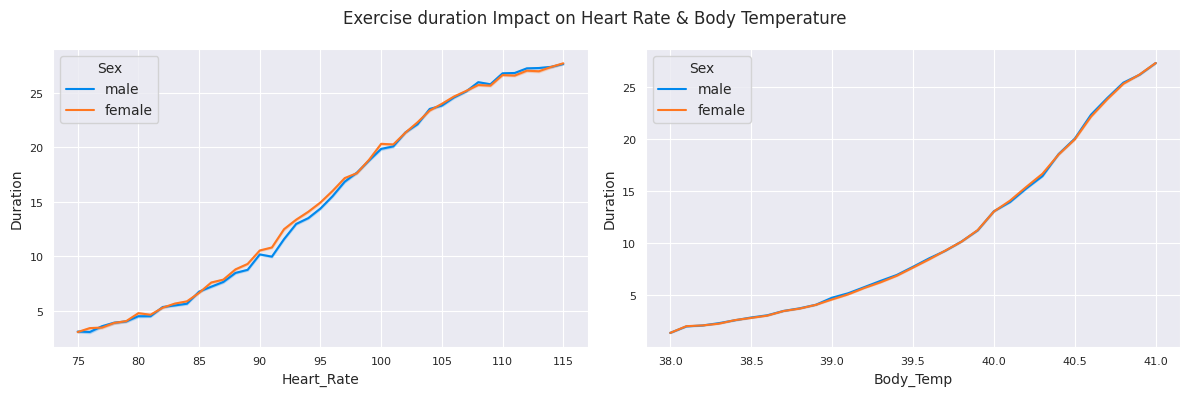

In [36]:
# We plot the duration by Heart Rate & Body Temp

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

sns.lineplot(
    data=calories_new, 
    x="Heart_Rate",
    y="Duration",
    hue="Sex",
    ax=axes[0]
)

sns.lineplot(
    data=calories_new, 
    x="Body_Temp",
    y="Duration",
    hue="Sex",
    ax=axes[1]
)

plt.suptitle(t="Exercise duration Impact on Heart Rate & Body Temperature")
plt.tight_layout()
plt.show()

As expected, we find, just like calorie expenditure per duration, a linear relationship between the variables. Both heart rate and body temperature increase with increasing exercise duration, in addition to there being no differences regarding gender.

In [37]:
duration_hr_bt = calories_new[["Heart_Rate", "Body_Temp"]].set_index(calories_new["Duration"])

duration_hr_bt.describe()

Heart_Rate      Body_Temp
count  746271.000000  746271.000000
mean       95.500278      40.041293
std         9.372154       0.758306
min        75.000000      38.000000
25%        88.000000      39.600000
50%        95.000000      40.300000
75%       103.000000      40.700000
max       115.000000      41.000000

Analyzing the data, we found that the average heart rate is 95.5 beats per minute, just within the normal upper limit of 60 to 100. As for average body temperature, we found 40°C, which is above the ideal temperature for exercise and a more appropriate temperature for intense exercise.

- How does heart rate behave when calorie expenditure is taken into account?
- What is the relationship between body temperature and calorie expenditure?

In [38]:
calories_hr = calories_new.pivot(columns="Heart_Rate", values="Calories")

calories_hr.describe()

Heart_Rate        75.0         76.0         77.0         78.0         79.0   \
count       6673.000000  4005.000000  4946.000000  5662.000000  8351.000000   
mean           7.728308     8.667166     9.748484    11.150830    12.367501   
std            6.373333     7.209567     7.647427     8.447048     8.449917   
min            1.000000     1.000000     1.000000     1.000000     1.000000   
25%            3.000000     3.000000     5.000000     6.000000     7.000000   
50%            6.000000     8.000000     8.000000    10.000000    10.000000   
75%           10.000000    11.000000    12.000000    14.000000    16.000000   
max           89.000000   215.000000    90.000000   215.000000   125.000000   

Heart_Rate        80.0          81.0          82.0          83.0   \
count       8901.000000  14034.000000  15852.000000  15672.000000   
mean          15.147961     14.907225     18.670767     19.692828   
std           10.420713     10.221397     11.767292     11.936277   
min            1.000000      1.000000      1.000000      1.000000   
25%            8.000000      8.000000     11.000000     11.000000   
50%           13.000000     12.000000     17.000000     19.000000   
75%           19.000000     20.000000     24.000000     26.000000   
max          183.000000    175.000000    223.000000    185.000000   

Heart_Rate         84.0   ...         106.0         107.0         108.0  \
count       16825.000000  ...  17864.000000  19744.000000  16885.000000   
mean           21.103477  ...    160.298253    166.438462    176.330649   
std            12.859959  ...     28.865989     26.559944     28.406124   
min             1.000000  ...     21.000000     16.000000     25.000000   
25%            11.000000  ...    144.000000    150.000000    159.000000   
50%            20.000000  ...    160.000000    166.000000    176.000000   
75%            28.000000  ...    179.000000    182.000000    193.000000   
max           125.000000  ...    269.000000    265.000000    300.000000   

Heart_Rate         109.0         110.0         111.0        112.0  \
count       12551.000000  12914.000000  11461.000000  8793.000000   
mean          177.425225    191.686000    192.322834   203.499488   
std            28.766968     28.119654     25.398447    30.339852   
min            13.000000     31.000000     19.000000    22.000000   
25%           160.000000    176.000000    179.000000   183.000000   
50%           178.000000    190.000000    193.000000   200.000000   
75%           192.000000    209.000000    206.000000   223.000000   
max           300.000000    289.000000    314.000000   289.000000   

Heart_Rate        113.0        114.0        115.0  
count       6916.000000  5473.000000  8673.000000  
mean         201.359167   207.248493   218.531765  
std           25.883039    23.300941    27.869162  
min           40.000000    65.000000    17.000000  
25%          187.000000   194.000000   203.000000  
50%          199.000000   204.000000   215.000000  
75%          217.000000   222.000000   234.000000  
max          300.000000   314.000000   314.000000  

[8 rows x 41 columns]

In [39]:
calories_bt = calories_new.pivot(columns="Body_Temp", values="Calories")

calories_bt.describe()

Body_Temp          38.0         38.1         38.2         38.3         38.4  \
count      18137.000000  3964.000000  4508.000000  5889.000000  4143.000000   
mean           4.681149     6.636478     7.145519     8.211751     9.348298   
std            5.328796     2.438296     2.391026     5.043677     5.593212   
min            1.000000     1.000000     1.000000     1.000000     1.000000   
25%            3.000000     5.000000     6.000000     7.000000     7.000000   
50%            4.000000     7.000000     7.000000     8.000000     9.000000   
75%            6.000000     8.000000     8.000000     9.000000    11.000000   
max          314.000000    47.000000    24.000000   261.000000   214.000000   

Body_Temp         38.5         38.6         38.7          38.8         38.9  \
count      5682.000000  9125.000000  9249.000000  10095.000000  9982.000000   
mean         10.206089    10.722301    12.765921     13.495493    15.229213   
std           5.270598     4.906472     5.428764      5.632701     6.736347   
min           2.000000     2.000000     2.000000      1.000000     2.000000   
25%           8.000000     8.000000    10.000000     11.000000    12.000000   
50%          10.000000    10.000000    12.000000     13.000000    15.000000   
75%          12.000000    13.000000    15.000000     16.000000    18.000000   
max         256.000000   207.000000   186.000000    189.000000   295.000000   

Body_Temp  ...          40.1          40.2          40.3          40.4  \
count      ...  35841.000000  32051.000000  48794.000000  41877.000000   
mean       ...     69.973940     78.339709     86.844756    103.644196   
std        ...     19.962417     23.422673     26.019942     32.206025   
min        ...     10.000000      5.000000     11.000000      9.000000   
25%        ...     57.000000     62.000000     69.000000     81.000000   
50%        ...     67.000000     75.000000     83.000000    100.000000   
75%        ...     81.000000     91.000000    101.000000    121.000000   
max        ...    208.000000    240.000000    266.000000    295.000000   

Body_Temp          40.5          40.6          40.7          40.8  \
count      49435.000000  47945.000000  66847.000000  52548.000000   
mean         115.008516    133.860465    150.230242    165.156181   
std           34.871830     37.851797     36.275858     37.461478   
min           20.000000     10.000000     18.000000     10.000000   
25%           91.000000    107.000000    123.000000    139.000000   
50%          109.000000    130.000000    148.000000    165.000000   
75%          135.000000    158.000000    174.000000    190.000000   
max          314.000000    295.000000    314.000000    314.000000   

Body_Temp          40.9          41.0  
count      39782.000000  28405.000000  
mean         173.357046    186.416969  
std           36.674746     35.086173  
min           24.000000     20.000000  
25%          148.000000    164.000000  
50%          174.000000    185.000000  
75%          198.000000    210.000000  
max          314.000000    314.000000  

[8 rows x 31 columns]

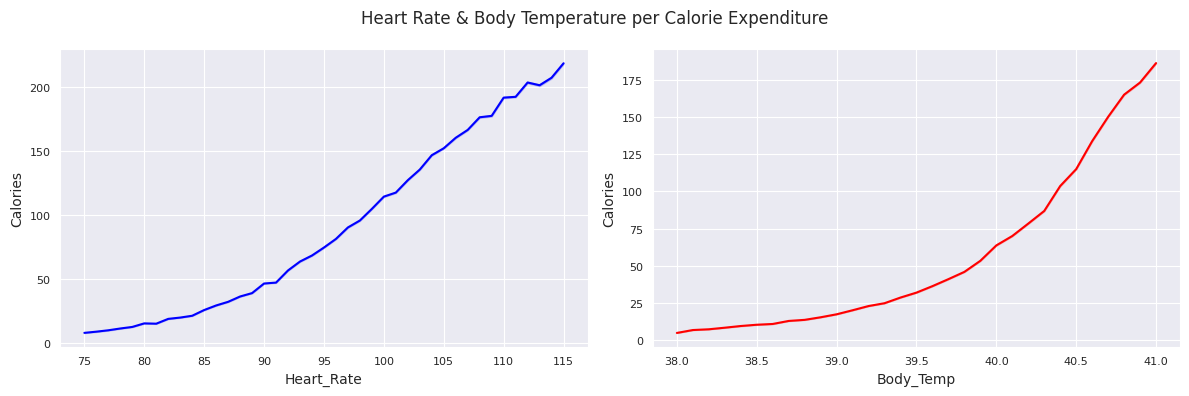

In [40]:
# We plot the calories by Heart Rate & Body Temp

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

sns.lineplot(
    data=calories_new, 
    x="Heart_Rate",
    y="Calories",
    color="b",
    ax=axes[0]
)

sns.lineplot(
    data=calories_new, 
    x="Body_Temp",
    y="Calories",
    color="r",
    ax=axes[1]
)

plt.suptitle(t="Heart Rate & Body Temperature per Calorie Expenditure")
plt.tight_layout()
plt.show()

As expected, the relationship between both variables and calorie expenditure is very linear. We found the same impact and relationship as with duration, as can be seen from the graphs of both analyses. We did not find it necessary to statistically analyze the overall averages of the two variables with calorie expenditure. Next, we will preprocess the data and begin model selection.

Note: We could extend this analysis by asking a larger number of interesting questions, such as the relationship between a person's weight and heart rate, taking into account that the greater the weight, the greater the effort on the heart. Would it be logical to find a linear relationship? Or how body temperature varies by gender, or the different analyses we could perform taking into account a person's age and the differences between heart rate and body temperature.